# <font color=green>deepBreaks Applications</font>
## Modeling the phenotypes and spectral tuning sites of opsin proteins based on amino-acid sequence...  

# <font color=red>Step 0: mySQL DB Setup -</font> Script 0
## *The following script sets up the schema for our vizphiz database.*
```

In [1]:
#All neccessary packages to import for data process steps.
#import mysql
import mysql.connector
#install mysql-connector-python // NOT mysql-connector
import re
import os
import datetime 
import subprocess
import shutil 
import csv

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password= "Geass5566!!" #change to your password
  )

mycursor = mydb.cursor()

try:
  mycursor.execute("""
  DROP DATABASE vizphiz_db;
  """)
  mydb.commit() 
except:
  "vizphiz_db does not yet exist!"
  pass

mycursor.execute("""
CREATE DATABASE vizphiz_db;
""")
mydb.commit() 

mycursor.execute("""
USE vizphiz_db;
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE scp
(
id int unsigned not null primary key,
genus varchar(50),
species varchar(50),
celltype varchar(50),
cellsubtype varchar(50),
lamdamax decimal(9,5),
error decimal(9,5),
chromophore varchar(50),
method varchar(50),
stage varchar(50),
refid int,
notes varchar(1000)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE heterologous
(
hetid int unsigned not null primary key,
genus varchar(50),
species varchar(50),
accession varchar(500),
mutations varchar(500),
lamdamax decimal(9,5),
error decimal(9,5),
cellculture varchar(50),
purification varchar(50),
spectrum varchar(50),
sourcetype varchar(50),
refid int,
notes varchar(1000)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE links
(
linkid int unsigned not null primary key,
accession varchar(500),
maxid int,
refid int,
evidence varchar(1000)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE litsearch
(
searchid int,
researcher varchar(50),
month int,
year int,
engine varchar(500),
keywords varchar(500)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE opsins
(
opsinid int unsigned not null primary key,
genefamily varchar(50),
genenames varchar(50),
genus varchar(50),
phylum varchar(25),
class varchar(25),
species varchar(50),
db varchar(50),
accession varchar(500),
dna varchar(10000),
aa varchar(3333),
refid int
);
""")
mydb.commit()

mycursor.execute("""
CREATE TABLE refs
(
refid int,
doi varchar(1000),
searchid int
);
""")
mydb.commit()

mydb.close()

In [4]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password= "Geass5566!!" #change to your password
  )

mycursor = mydb.cursor()
mycursor.execute("""
USE vizphiz_db;
""")
mydb.commit() 

try:
  mycursor.execute("""
  DROP TABLE mine_n_match;
  """)
  mydb.commit() 

except:
  pass

mycursor.execute("""
CREATE TABLE mine_n_match
(
mnm_id int unsigned not null primary key,
accession varchar(500),
genus varchar(50),
species varchar(50),
lamdamax decimal(9,5),
max_id varchar(1000),
lngcor_id varchar(1000),
aa varchar(3333),
gene_description varchar(1000),
notes varchar(1000)
);
""")
mydb.commit() 
mydb.close()

In [6]:
#All neccessary packages to import for data process steps.
import mysql
import mysql.connector
#install mysql-connector-python // NOT mysql-connector
import re
import os
import datetime 
import subprocess
import shutil 

# <font color=red>STEP 0: Data Base Setup -</font> Script 1 - Import Literature-Search data into mySQL

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
file1 = open(f'{path}/litsearch.tsv', 'r')
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")

      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.litsearch (searchid, researcher, month, year, engine, keywords) VALUES (%s, %s, %s,%s, %s, %s)"
      val = (columns[0], columns[1], columns[2], columns[3], columns[4], columns[5])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")

# <font color=red>STEP 0: Data Base Setup -</font> Script 2 - Import References into mySQL

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
file1 = open(f'{path}/references.tsv', 'r')
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")

      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.refs (refid, doi, searchid) VALUES (%s, %s, %s)"
      val = (columns[0], columns[1], columns[4])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")
    

# <font color=red>STEP 0: Data Base Setup -</font> Script 3 - Import Heterolgous Data into mySQL


In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
file1 = open(f'{path}/heterologous.tsv', 'r', encoding="utf8")
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")
      print(columns)
      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.heterologous (hetid, genus, species, accession, mutations, lamdamax, error, cellculture, purification, spectrum, sourcetype, refid) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
      val = (columns[0], columns[1], columns[2], columns[3], columns[4], columns[5], columns[6], columns[7], columns[8], columns[9], columns[10], columns[11])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")

# <font color=red>STEP 0: Data Base Setup -</font> Script 4 - Import Seqience Data into mySQL

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!"
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
file1 = open(f'{path}/opsins.tsv', 'r')
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")

      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.opsins (opsinid, genefamily, genenames, phylum, class, genus, species, db, accession, dna, aa, refid) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
      val = (columns[0], columns[1], columns[2], columns[3], columns[5], columns[6], columns[7], columns[8], columns[9], columns[10], columns[11], columns [12])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")



# <font color=red>STEP 0: Data Base Setup -</font> Script 5 - Import Mine-n-Match Data into mySQL

In [5]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
file1 = open(f'{path}/mine_n_match_curated.tsv', 'r', encoding="utf8")
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split(",")
      print(columns)
      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.mine_n_match (mnm_id, accession, genus, species, lamdamax, max_id, lngcor_id, aa, gene_description, notes) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
                
      # **IMPORTANT:** Verify these column indices!
      val = (columns[0], columns[1], columns[2], columns[3], columns[6], columns[8], columns[9], columns[10], columns[11], columns[12])  
                
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")

['0', 'DQ168661.1', 'Poecilia', 'reticulata', '98.034', '560.0', '560.0', '0.0', '1274.0', '', 'MAEEWGKQVFAARRHEDTTRGAAFTYTNSNHTKDPFEGPNYHIAPRWVYNVSTLWMCIVVVLSDFTNGLVLVATAKFKKLRHPLNWILVNLAIADLGETVFASTISVCNQFFGYFILGHPMCVFEGYVVSTCGIAALWSLTIISWERWIVVCKPFGNVKFDAKWATAGIVFSWAWAAVWCAPPIFGWSRYWPHGLKTSCGPDVFSGSDDPGVLSYMIVLMITCCIIPLAIIILCYLAVWLAIRAVAMQQKESESTQKAEREVSRMVVVMIIAYCVCWGPYTFFACFPAANPGYAFHPLAAAMPAYFAKSATIYNPVIYVFMNRQFRTCIMQLFGKQVDDGFEVSTSKTEVSSVAPA', '"Poecilia reticulata LWS_QUEm5_L06 long wave-sensitive opsin mRNA', ' complete cds"', '\n']
INSERT INTO vizphiz_db.mine_n_match (mnm_id, accession, genus, species, lamdamax, max_id, lngcor_id, aa, gene_description, notes) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
('0', 'DQ168661.1', 'Poecilia', 'reticulata', '560.0', '1274.0', '', 'MAEEWGKQVFAARRHEDTTRGAAFTYTNSNHTKDPFEGPNYHIAPRWVYNVSTLWMCIVVVLSDFTNGLVLVATAKFKKLRHPLNWILVNLAIADLGETVFASTISVCNQFFGYFILGHPMCVFEGYVVSTCGIAALWSLTIISWERWIVVCKPFGNVKFDAKWATAGIVFSWAWAAVWCAPPIFGWSRYWPHGLKTSCGPDVF

# <font color=red>STEP 1: Extract Data Subsets From Vizphiz</font>
### Output = 8 Different Data Subsets 

In [40]:
#All neccessary packages to import for data process steps.
import mysql
import mysql.connector
#install mysql-connector-python // NOT mysql-connector
import re
import os
import datetime 
import subprocess
import shutil 
import csv
import fileinput


In [41]:
#directory preperation
dt_label = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
seq_report_dir = str(f'vpod_1.2_data_splits_{dt_label}')
os.makedirs(seq_report_dir)

#declaring all variables for different sequence data subsets and their metadata
wd_output = f'{seq_report_dir}/wds.txt'
sws_output = f'{seq_report_dir}/uss.txt'
mws_output = f'{seq_report_dir}/mls.txt'
rod_output = f'{seq_report_dir}/rod.txt'
wd_ni_output = f'{seq_report_dir}/vert.txt'
wt_vert_output = f'{seq_report_dir}/wt_vert.txt'
inv_output = f'{seq_report_dir}/inv_only.txt'
wt_inv_output = f'{seq_report_dir}/wt_inv_only.txt'
nmoc_output = f'{seq_report_dir}/wt.txt'
mut_output = f'{seq_report_dir}/mut_only.txt'
wh_metadata = f'{seq_report_dir}/wds_meta.tsv'
sw_metadata = f'{seq_report_dir}/uss_meta.tsv'
mw_metadata = f'{seq_report_dir}/mls_meta.tsv'
rh_metadata = f'{seq_report_dir}/rod_meta.tsv'
wd_ni_metadata = f'{seq_report_dir}/vert_meta.tsv'
inv_metadata = f'{seq_report_dir}/inv_meta.tsv'
nmoc_metadata = f'{seq_report_dir}/wt_meta.tsv'
mut_metadata = f'{seq_report_dir}/mut_meta.tsv'
wt_vert_metadata = f'{seq_report_dir}/wt_vert_meta.tsv'
redundant_datapoints = f'{seq_report_dir}/redundant_datapoints_log.tsv'


#Setting the names for the headers at the top of each metadata file
meta_data_list = [wh_metadata,sw_metadata,mw_metadata,rh_metadata,wd_ni_metadata,inv_metadata,nmoc_metadata,wt_vert_metadata,mut_metadata]
meta_first_line = "Seq_Id\tLambda_Max\tSpecies\tOpsin_Family\tPhylum\tClass\tAccession\tMutations\tRefId\nBovine\t500.0000\tBos_tarus\tRh1\tChordata\tMammalia\tNM_001014890\n"
invert_first_line = "Seq_Id\tLambda_Max\tSpecies\tOpsin_Family\tPhylum\tClass\tAccession\tMutations\tRefId\nSquid\t473.0000\tTodarodes_pacificus\tRh1\tMollusca\tCephalopoda\tX70498\n"
bovine_seq = ">Bovine\nMNGTEGPNFYVPFSNKTGVVRSPFEAPQYYLAEPWQFSMLAAYMFLLIMLGFPINFLTLYVTVQHKKLRTPLNYILLNLAVADLFMVFGGFTTTLYTSLHGYFVFGPTGCNLEGFFATLGGEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLVGWSRYIPEGMQCSCGIDYYTPHEETNNESFVIYMFVVHFIIPLIVIFFCYGQLVFTVKEAAAQQQESATTQKAEKEVTRMVIIMVIAFLICWLPYAGVAFYIFTHQGSDFGPIFMTIPAFFAKTSAVYNPVIYIMMNKQFRNCMVTTLCCGKNPLGDDEASTTVSKTETSQVAPA\n"

#misc int variales for the counting loops
m = 0
s = 0
l = 0
r = 0
c = 0
z = 0
q = 0
wt_vert = 0
mut = 0

#regular expressions for filtering different opsin family types 
rod = re.compile('^Rh$|Rh[0-2]|exoRh')
d = re.compile("^NM_001014890.2$|^NM_001014890$|^P02699.1$")
sws_reg = re.compile('^SWS')
uvs_reg = re.compile('^UVS')
mws_reg = re.compile('^MWS')
lws_reg = re.compile('^LWS')
rh1_reg = re.compile('^Rh$|^Rh[0-1]|exoRh')
rh2_reg = re.compile('^Rh2')
non_viz = re.compile('^POps|MOps|GoC|PeroOps')

#Decide if you want to filter out reduant opsin data (identical sequences)
#If 'ignore_filter' set to 'True' then redundant data will be kept
ignore_filter = False
#If 'only_visual_opsins' set to 'True' then only visual opsins will be kept and non-visual opsins (i.e. Pero-opsins) will be ignored/filtered out
only_visual_opsins = True
#If 'keep_conflicts' set to 'True' then redudant sequences with conflicting lmax values will be kept
keep_conflicts = False

In [42]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database="vizphiz",
  password="Geass5566!!"
) 
mycursor = mydb.cursor()

#sql = "select DISTINCT o.genus,o.species,o.genefamily,o.accession,h.lamdamax,o.aa,o.phylum,o.class,h.mutations,o.refid from vizphiz_db.opsins o, vizphiz_db.heterologous h WHERE (o.accession = h.accession AND o.refid = h.refid); "
sql = """
SELECT DISTINCT 
    o.genus, o.species, o.genefamily, o.accession, 
    h.lamdamax, o.aa, o.phylum, o.class, h.mutations, o.refid 
FROM 
    vizphiz_db.opsins o
JOIN 
    vizphiz_db.heterologous h 
ON 
    o.accession = h.accession AND o.refid = h.refid;
"""
mycursor.execute(sql)
myresult = mycursor.fetchall()
seq_list = []
lmax_list = []
species_list = []
acc_list = []
gene_family_list = []
conflicting_lmax = {}

for x in myresult:
  skip = False
  lmax = x[4]  
  try:
    index = seq_list.index(x[5].strip().replace(' ',''))
    lmax_of_index = lmax_list[index]
    species_of_index = species_list[index]
    acc_of_index = acc_list[index]
    gene_family_of_index = gene_family_list[index]
  except:
    lmax_of_index = None
    
  species_check = str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')
  if (x[5].strip() in seq_list) and (float(x[4]) != float(lmax_of_index)) and (lmax_of_index != None):
    # Redundant sequence found
    # Handle conflicting lmax values
    skip = True
    with open(redundant_datapoints, 'a+') as f:
      f.write(f'''Accessions {acc_of_index} and {x[3]} encode the same sequence but have conflicting lmax values ({lmax_of_index} and {lmax} respectively).\n''')
      if species_of_index != species_check:
        f.write(f'''The two sequences are from different species ({species_of_index} and {species_check}).\n''')
      else:  
        f.write(f'''The two sequences are from the same species ({species_of_index}).\n''')
      f.write(f'''We will be taking the average of all conflicting values, and dropping this entry from the final datasplits.\n''')
      f.write(f'''Note - the gene families of the two sequences are {gene_family_of_index} and {x[2]} - if this raises concern, please double check the entries to resolve this issue.\n\n''')
    
    if keep_conflicts == False:
      # Store conflicting lmax values to modify original with average of all conflicting values
      if acc_of_index not in conflicting_lmax:
          conflicting_lmax[acc_of_index] = [float(lmax_of_index), float(x[4])]  # Convert x[4] to float
      else:
          conflicting_lmax[acc_of_index].append(float(x[4]))
    else:
      skip = False
        
  elif (x[5].strip().replace(' ','') in seq_list) and (x[4] == lmax_of_index):
    # Redundant sequence found
    # Handle identical sequences and lmax values
    # Skipping exactly redundant entries 
    skip = True
    with open(redundant_datapoints, 'a+') as f:
      f.write(f'''Accessions {acc_of_index} and {x[3]} encode the same sequence and have the same lmax values ({lmax_of_index}).''')
      if species_of_index != species_check:
        f.write(f'''\nDespite that the two sequences are from different species ({species_of_index} and {species_check}) we will skip this entry but take the value from the first entry.\nNote - the gene families of the two sequences are {gene_family_of_index} and {x[2]} -  if this raises concern, please double check the entries to resolve this issue.\n\n''')
      else:
        f.write(f'''Because the two sequences are from the same species ({species_of_index}) we will skip this entry and only keep the value from the first entry.\n\n''')
  else:
    # Store new sequence data
    species_list.append(species_check)
    gene_family_list.append(x[2])
    acc_list.append(x[3])
    lmax_list.append(lmax)
    seq_list.append(x[5].strip().replace(' ',''))
  
  if ignore_filter == True:
    skip = False
    
  if only_visual_opsins == True:
    if non_viz.match(x[2]):
      skip = True
      
  if (lmax == 0) or (skip == True):
    pass
  else:    
  #SEQUENCE-DATA SECTION
    #whole-dataset    
    with open(wd_output, 'a') as f:
      if m == 0:
          f.write(bovine_seq)
      if (d.match(x[3])):
        pass
      else:
        m += 1 
        #This makes the fasta format file
        seq = ">S" + str(m)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #vertebrate dataset
    with open(wd_ni_output, 'a') as f:
      if x[6] != "Chordata" or d.match(x[3]):
        pass
      else:
        if c == 0:
          f.write(bovine_seq)
        c += 1 
        #This makes the fasta format file
        seq = ">S" + str(c)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #invertebrate dataset
    with open(inv_output, 'a') as f:
      if (x[6] != "Chordata"):
        if q == 0:
          f.write(">Squid\nMGRDLRDNETWWYNPSIVVHPHWREFDQVPDAVYYSLGIFIGICGIIGCGGNGIVIYLFTKTKSLQTPANMFIINLAFSDFTFSLVNGFPLMTISCFLKKWIFGFAACKVYGFIGGIFGFMSIMTMAMISIDRYNVIGRPMAASKKMSHRRAFIMIIFVWLWSVLWAIGPIFGWGAYTLEGVLCNCSFDYISRDSTTRSNILCMFILGFFGPILIIFFCYFNIVMSVSNHEKEMAAMAKRLNAKELRKAQAGANAEMRLAKISIVIVSQFLLSWSPYAVVALLAQFGPLEWVTPYAAQLPVMFAKASAIHNPMIYSVSHPKFREAISQTFPWVLTCCQFDDKETEDDKDAETEIPAGESSDAAPSADAAQMKEMMAMMQKMQQQQAAYPPQGYAPPPQGYPPQGYPPQGYPPQGYPPQGYPPPPQGAPPQGAPPAAPPQGVDNQAYQA\n")
        q += 1 
        #This makes the fasta format file
        seq = ">S" + str(q)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)
      else:
        pass
    
    #wild-type dataset
    with open(nmoc_output, 'a') as f:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if z == 0:
          f.write(bovine_seq)
        if(d.match(x[3])):
          pass
        else:
          z += 1 
          #This makes the fasta format file
          seq = ">S" + str(z)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)

    #wild-type vertebrates dataset
    with open(wt_vert_output, 'a') as f:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if (x[6] != "Chordata") or d.match(x[3]) or ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if wt_vert == 0:
          f.write(bovine_seq)
        if(d.match(x[3])):
          pass
        else:
          wt_vert += 1 
          #This makes the fasta format file
          seq = ">S" + str(wt_vert)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)

    #just mutants dataset
    with open(mut_output, 'a') as f:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        if mut == 0:
          f.write(bovine_seq)
        if(d.match(x[3])):
          pass
        else:
          mut += 1 
          #This makes the fasta format file
          seq = ">M" + str(mut)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)
      else:
        pass
    
    #UVS and SWS dataset
    with open(sws_output, 'a') as f:
      p = re.compile('^SWS|^UVS')
      if p.match(x[2]) and x[6] == "Chordata":
        s+=1
        if s == 1:
          f.write(bovine_seq)
        #This makes the fasta format file
        seq = ">S" + str(s)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #MWS and LWS dataset
    with open(mws_output, 'a') as f:
      p = re.compile('^MWS|^LWS')
      if p.match(x[2]) and x[6] == "Chordata":
        l+=1
        if l == 1:
          f.write(bovine_seq)
        #This makes the fasta format file
        seq = ">S" + str(l)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #rods dataset
    with open(rod_output, 'a') as f:
      p = re.compile('Rh[0-2]|exoRh')
      if p.match(x[2]):
        if r == 0:
          f.write(bovine_seq)
        if (x[6] != "Chordata") or d.match(x[3]):
          pass
        else:
          r+=1
          #This makes the fasta format file
          seq = ">S" + str(r)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)

  #METADATA SECTION - same idea and naming convention for the files as above. 
    with open(wh_metadata, 'a') as g:
      if m == 1:
          g.write(meta_first_line)      
      if (d.match(x[3])):
        pass
      else:        
        md =  str("S" + str(m) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" +str(x[9]).strip() + "\n"
        g.write(md)

    with open(wd_ni_metadata, 'a') as g:
      if x[6] != "Chordata" or d.match(x[3]):
        pass
      else:
        if c == 1:
          g.write(meta_first_line)      

        md =  str("S" + str(c) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(inv_metadata, 'a') as g:
      if (x[6] != "Chordata"):
        if q == 1:
          g.write(invert_first_line)
        md =  str("S" + str(q) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
        g.write(md)
      else:
        pass
          
    with open(sw_metadata, 'a') as g:
      p = re.compile('^SWS|^UVS')
      if p.match(x[2]) and x[6] == "Chordata":
        if s == 1:
          g.write(meta_first_line)
        md =  str("S" + str(s) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(mw_metadata, 'a') as g:
      p = re.compile('^MWS|^LWS')
      if p.match(x[2]) and x[6] == "Chordata":
        if l == 1:
          g.write(meta_first_line)        
        md =  str("S" + str(l) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(rh_metadata, 'a') as g:
      p = re.compile('Rh[0-3]|exoRh')

      if p.match(x[2]):
        if r == 1:
          g.write(meta_first_line)      
        if (x[6] != "Chordata") or d.match(x[3]):
          pass
        else:  
          md =  str("S" + str(r) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
          g.write(md)

    with open(nmoc_metadata, 'a') as g:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if z == 1:
          g.write(meta_first_line)      
        if(d.match(x[3])):
          pass
        else:        
          md =  str("S" + str(z) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
          g.write(md)
          
    with open(wt_vert_metadata, 'a') as g:
      if (x[6] != "Chordata") or d.match(x[3]) or ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if wt_vert == 1:
          g.write(meta_first_line)      

        md =  str("S" + str(wt_vert) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(mut_metadata, 'a') as g:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        if mut == 1:
          g.write(meta_first_line)      
        if(d.match(x[3])):
          pass
        else:        
          md =  str("M" + str(mut) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[9]).strip() + "\n"
          g.write(md)
      else:
        pass
      
mydb.close()

# Calculate average lmax and update for sequences flagged as haivng redundant entries with conflicting lmax values in the database
for dsplit in meta_data_list:
    file = fileinput.input(dsplit, inplace=True)
    for line in file:
        modify = False
        fields = line.strip().split("\t")
        lmax = fields[1] 
        accession = fields[6] 
        for key in conflicting_lmax.keys():
            if accession == key:
                modify = True
        if modify == True:
            conflicting_lmax[accession]
            avg_lmax = float(sum(conflicting_lmax[accession])) / float(len(conflicting_lmax[accession]))
            fields[1] = str(avg_lmax)
        print("\t".join(fields))  # Print the modified line, which overwrites the original line in the file
    file.close()    

In [43]:
#Creates an additional sequence file where all the mutants are 
#added to the bottom of the wild-type sequences so they can be aligned for WT model test.
mut_only = open(mut_output).readlines()
mut_nmoc = f'{seq_report_dir}/wt_mut_added.txt'
shutil.copy(nmoc_output , mut_nmoc)
x = 0
for lines in mut_only:
  if x <= 1:
    if x == 0:
      with open(mut_nmoc, 'a') as m:
        m.write('\n')
    else:
      pass
    x+=1
  else:
    with open(mut_nmoc, 'a') as m:
      m.write(lines)

In [44]:
from deepBreaks.preprocessing import read_data
import pandas as pd
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
mnm_file = f'{path}/mine_n_match_curated.csv'
mnm_data = read_data(mnm_file, seq_type = None, is_main=False)
mnm_data.head()


Accession          Genus     Species  \
mnm_id                                          
0       DQ168661.1       Poecilia  reticulata   
1       AY745192.1        Setonix  brachyurus   
2       DQ088628.1  Melanochromis  vermivorus   
3         L11865.1      Carassius     auratus   
4       AF425072.1   Oncorhynchus      mykiss   

        %Identity_Nearest_VPOD_Sequence  prediction_value  \
mnm_id                                                      
0                                98.034             560.0   
1                                86.686             538.0   
2                                93.838             555.0   
3                                90.544             509.0   
4                                85.876             497.9   

        closest_measurement  abs_diff  max_id  lngcor_id  \
mnm_id                                                     
0                     560.0       0.0  1274.0        NaN   
1                     538.0       0.0  1475.0        NaN   
2                     555.0       0.0   389.0        NaN   
3                     509.0       0.0  1349.0        NaN   
4                     498.0       0.1  1208.0        NaN   

                                                  Protein  \
mnm_id                                                      
0       MAEEWGKQVFAARRHEDTTRGAAFTYTNSNHTKDPFEGPNYHIAPR...   
1       MTQAWDPAGFLAWRRDENEETTRASLFVYTNSNNTKGPFEGPNYHI...   
2       MAEEWGKQSFAARRYHEDSTRGSAFAYTNSNNTRDPFEGPNYHIAP...   
3       MNGTEGKNFYVPMSNRTGLVRSPFEYPQYYLAEPWQFKILALYLFF...   
4       MNGTEGPDFYVPMSNATGIVRNPYEYPQYYLVSPAAYSLMAAYMFF...   

                                         Gene_Description  Notes  
mnm_id                                                            
0       Poecilia reticulata LWS_QUEm5_L06 long wave-se...    NaN  
1       Setonix brachyurus long-wave sensitive opsin m...    NaN  
2       Melanochromis vermivorus putative red sensitiv...    NaN  
3       Carassius auratus green cone opsin mRNA, compl...    NaN  
4        Oncorhynchus mykiss RH1 opsin mRNA, complete cds    NaN

In [45]:
#seq_report_dir = './vpod_1.2_data_splits_2024-10-18_17-25-31'
wt_data = f'{seq_report_dir}/wt_meta.tsv'
wt_df = read_data(wt_data, seq_type = None, is_main=False)
wt_df.head()


Lambda_Max                      Species Opsin_Family    Phylum  \
Seq_Id                                                                   
Bovine       500.0                    Bos_tarus          Rh1  Chordata   
S1           502.0            Neoniphon_sammara          Rh1  Chordata   
S2           502.0          Neoniphon_argenteus          Rh1  Chordata   
S3           481.0       Neoniphon_aurolineatus          Rh1  Chordata   
S4           494.0  Sargocentron_punctatissimum          Rh1  Chordata   

              Class     Accession  Mutations  RefId  
Seq_Id                                               
Bovine     Mammalia  NM_001014890        NaN    NaN  
S1      Actinopteri      U57536.1        NaN  160.0  
S2      Actinopteri      U57540.1        NaN  160.0  
S3      Actinopteri      U57541.1        NaN  160.0  
S4      Actinopteri      U57543.1        NaN  160.0

In [5]:
len(wt_df)

364

In [46]:
wt_mnm_seqs = f'{seq_report_dir}/wt_mnm.txt'
shutil.copy(nmoc_output , wt_mnm_seqs)

'vpod_1.2_data_splits_2024-10-19_10-30-09/wt_mnm.txt'

In [47]:
mnm_seqs = mnm_data['Protein'].to_list()

In [23]:
mnm_ids = list(range(len(wt_df),len(wt_df)+len(mnm_seqs)))

In [48]:
with open(wt_mnm_seqs, 'a') as f:
    for id, seq in zip(mnm_ids, mnm_seqs):
        f.write(f'>S{id}\n{seq}\n')

Pick up working to merge the two meta dataframes together!

In [75]:
combined_ids = wt_df.index.to_list()
for ids in mnm_ids:
    combined_ids.append(f'S{ids}')
len(combined_ids)

575

In [50]:
combined_lmax = wt_df['Lambda_Max'].to_list()
for lmax in mnm_data['closest_measurement']:
    combined_lmax.append(lmax)
len(combined_lmax)

575

In [51]:
combined_acc = wt_df['Accession'].to_list()
for acc in mnm_data['Accession']:
    combined_acc.append(acc)
len(combined_acc)

575

In [76]:
mnm_wt_df = pd.DataFrame(columns=['Accession','Lambda_Max'], index=combined_ids)
mnm_wt_df['Accession'] = combined_acc
mnm_wt_df['Lambda_Max']= combined_lmax


In [77]:
mnm_wt_df.to_csv(path_or_buf=f"./{seq_report_dir}/wt_mnm_meta.csv", index=True)

# <font color=red>STEP 2: Align Raw Data w/MAFFT and Format for 'deepBreaks'</font>
## REMINDER - You will need to change the directory for the 'mafft_exe' variable to the one of your own operating system!


In [54]:
from Bio.Align.Applications import MafftCommandline
from Bio import AlignIO

data_split_list = [wd_output,sws_output,mws_output,rod_output,wd_ni_output,inv_output,nmoc_output,wt_vert_output,mut_nmoc,mut_output,wt_mnm_seqs]
output_list = []
mafft_exe = 'C:/Users/safra/mafft-win/mafft.bat' 

for data in data_split_list:
    output = f'{data.split(".")[0]}.{data.split(".")[1]}_aligned.txt'
    mafft_cline = MafftCommandline(mafft_exe, input=f'./{data}')
    #print(mafft_cline)
    stdout, stderr = mafft_cline()

    with open(output, "w") as handle:
        handle.write(stdout)
        #print(handle)
    align = AlignIO.read(output, "fasta")
    output_list.append(f'{output}')

print(output_list)

['vpod_1.2_data_splits_2024-10-19_10-30-09/wds_aligned.txt', 'vpod_1.2_data_splits_2024-10-19_10-30-09/uss_aligned.txt', 'vpod_1.2_data_splits_2024-10-19_10-30-09/mls_aligned.txt', 'vpod_1.2_data_splits_2024-10-19_10-30-09/rod_aligned.txt', 'vpod_1.2_data_splits_2024-10-19_10-30-09/vert_aligned.txt', 'vpod_1.2_data_splits_2024-10-19_10-30-09/inv_only_aligned.txt', 'vpod_1.2_data_splits_2024-10-19_10-30-09/wt_aligned.txt', 'vpod_1.2_data_splits_2024-10-19_10-30-09/wt_vert_aligned.txt', 'vpod_1.2_data_splits_2024-10-19_10-30-09/wt_mut_added_aligned.txt', 'vpod_1.2_data_splits_2024-10-19_10-30-09/mut_only_aligned.txt', 'vpod_1.2_data_splits_2024-10-19_10-30-09/wt_mnm_aligned.txt']


In [55]:
#enters list of aligned text files here.
inputs = output_list
deep_breaks_input_data = []

i=0
k = 0
for item in inputs:
    print(item)
    lines = open(inputs[i]).readlines()
    output = f'./{inputs[i].split(".")[0]}.{inputs[i].split(".")[1]}_VPOD_1.2_het.fasta'
    deep_breaks_input_data.append(output)
    print(output)
    file = open(output, 'w')
    m=0
    for line in lines:
        snip = str(lines[k])
        if '>' in snip:
            if m == 0:
                m+=1
            else:
                file.write("\n")
            file.write(snip)
        else:
            entry = ""
            entry = str(snip.replace("\n",""))
            file.write(entry)
        k+=1
    k = 0
    i+=1
    file.close()

vpod_1.2_data_splits_2024-10-19_10-30-09/wds_aligned.txt
./vpod_1.2_data_splits_2024-10-19_10-30-09/wds_aligned_VPOD_1.2_het.fasta
vpod_1.2_data_splits_2024-10-19_10-30-09/uss_aligned.txt
./vpod_1.2_data_splits_2024-10-19_10-30-09/uss_aligned_VPOD_1.2_het.fasta
vpod_1.2_data_splits_2024-10-19_10-30-09/mls_aligned.txt
./vpod_1.2_data_splits_2024-10-19_10-30-09/mls_aligned_VPOD_1.2_het.fasta
vpod_1.2_data_splits_2024-10-19_10-30-09/rod_aligned.txt
./vpod_1.2_data_splits_2024-10-19_10-30-09/rod_aligned_VPOD_1.2_het.fasta
vpod_1.2_data_splits_2024-10-19_10-30-09/vert_aligned.txt
./vpod_1.2_data_splits_2024-10-19_10-30-09/vert_aligned_VPOD_1.2_het.fasta
vpod_1.2_data_splits_2024-10-19_10-30-09/inv_only_aligned.txt
./vpod_1.2_data_splits_2024-10-19_10-30-09/inv_only_aligned_VPOD_1.2_het.fasta
vpod_1.2_data_splits_2024-10-19_10-30-09/wt_aligned.txt
./vpod_1.2_data_splits_2024-10-19_10-30-09/wt_aligned_VPOD_1.2_het.fasta
vpod_1.2_data_splits_2024-10-19_10-30-09/wt_vert_aligned.txt
./vpod_1.2_d

In [56]:
print(deep_breaks_input_data)

['./vpod_1.2_data_splits_2024-10-19_10-30-09/wds_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2024-10-19_10-30-09/uss_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2024-10-19_10-30-09/mls_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2024-10-19_10-30-09/rod_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2024-10-19_10-30-09/vert_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2024-10-19_10-30-09/inv_only_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2024-10-19_10-30-09/wt_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2024-10-19_10-30-09/wt_vert_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2024-10-19_10-30-09/wt_mut_added_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2024-10-19_10-30-09/mut_only_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2024-10-19_10-30-09/wt_mnm_aligned_VPOD_1.2_het.fasta']


# <font color=red>STEP 3: deepBreaks</font>
## THIS IS A LONG SECTION! 
### **Output** = folder containing all results from model training, including comparison of model performances, an amino-acid site importance report + figures, and the top 5 trained models in a .pkl file format.

In [99]:
# importing deepBreaks libraries 
from deepBreaks.utils_alt2 import get_models, get_scores, get_params, get_empty_params, make_pipeline
from deepBreaks.preprocessing import MisCare, ConstantCare, URareCare, CustomOneHotEncoder
from deepBreaks.preprocessing import FeatureSelection, CollinearCare
from deepBreaks.preprocessing import read_data
from deepBreaks.models import model_compare_cv, finalize_top, importance_from_pipe, mean_importance, summarize_results
from deepBreaks.visualization import plot_scatter, dp_plot, plot_imp_model, plot_imp_all
from deepBreaks.preprocessing import write_fasta
import warnings
import datetime
import os
import shutil 

In [58]:
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [78]:
# defining user params, file pathes, analysis type

#assign your path to folder containing all the datasplits
path = './vpod_1.2_data_splits_2024-10-19_10-30-09'
# path to sequences of interest
seqFileName = f'{path}/wt_mnm_aligned_VPOD_1.2_het.fasta' 
# path to corresponding metadata of interest
metaDataFileName = f'{path}/wt_mnm_meta.csv' 
# name of the phenotype
mt = 'Lambda_Max'

# type of the sequences
seq_type = 'aa'

# type of the analysis if it is a classification model, then we put cl instead of reg
ana_type = 'reg' 

gap_threshold = 0.5

#Whether or not you want to drop the reference sequence from the training data- Usually 'Bovine' or 'Squid'
drop_ref = False


In [79]:
# making a unique directory for saving the reports of the analysis
print('direcory preparation')
dt_label = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
seqFile = seqFileName.split('/')[2]
#print(seqFile)
seqFile = seqFile.split('.')[0]+'.'+seqFile.split('.')[1]
#print(seqFile)
report_dir = str(seqFile +'_' + mt + '_' + dt_label)
os.makedirs(report_dir)

direcory preparation


In [80]:
%%time
print('reading meta-data')
# importing metadata
meta_data = read_data(metaDataFileName, seq_type = None, is_main=False)
# importing sequences data
print('reading fasta file')

tr = read_data(seqFileName, seq_type = seq_type, is_main=True, gap_threshold=gap_threshold)

shutil.copy2(f'{seqFileName}',report_dir)
write_fasta(dat = tr, fasta_file = f'{seqFile}_gap_dropped.fasta' , report_dir = report_dir)

reading meta-data
reading fasta file
wt_mnm_aligned_VPOD_1.2_het_gap_dropped.fasta was saved successfully
CPU times: total: 453 ms
Wall time: 448 ms


In [81]:
try:
    reference_seq = tr.loc['Bovine'].copy()
    ref_seq_name = 'bovine'
    if drop_ref == True:
        meta_data = meta_data.drop('Bovine')
    #print(bovine)
except:
    reference_seq = tr.loc['Squid'].copy()
    ref_seq_name = 'squid'
    #print(squid)
reference_seq.to_csv(path_or_buf= f'{report_dir}/ref_sequence.csv',index = True,mode="w")

In [83]:
#meta_data_filtered = meta_data[meta_data['Mutations'].isnull()]

In [82]:
tr = tr.merge(meta_data.loc[:, mt],  left_index=True, right_index=True)
tr.shape

(575, 353)

In [84]:
tr.head()

p1   p2   p3 p4 p5 p6 p7 p8 p9 p10  ... p344 p345 p346 p347 p348  \
Bovine    M    N    G  T  E  G  P  N  F   Y  ...  NaN  NaN  NaN    S    Q   
S1        M    N    G  T  E  G  P  Y  F   Y  ...    S    A  NaN    S    S   
S2      NaN  NaN  NaN  T  E  G  P  Y  F   Y  ...    S    A  NaN    S    S   
S3      NaN  NaN  NaN  T  E  G  P  D  F   Y  ...    S    A  NaN    S    S   
S4      NaN  NaN  NaN  T  E  G  P  F  F   Y  ...    S    A  NaN    S    S   

       p349 p350 p351 p352 Lambda_Max  
Bovine    V    A    P    A      500.0  
S1        V    S    P    A      502.0  
S2        V    S    P    A      502.0  
S3        V    S    P    A      481.0  
S4        V    S    P    A      494.0  

[5 rows x 353 columns]

In [85]:
import numpy as np
import csv
import pandas as pd

In [86]:
y = tr.loc[:, mt].values
tr.drop(mt, axis=1, inplace=True)
print('Shape of data is: ', tr.shape)

Shape of data is:  (575, 352)


**Attention**: metadata and sequences data should have the names as their row names and for each sequence their must be a value in the meta data file.

In [87]:
print('metadata looks like this:')
meta_data.head()

metadata looks like this:


Accession  Lambda_Max
Bovine  NM_001014890       500.0
S1          U57536.1       502.0
S2          U57540.1       502.0
S3          U57541.1       481.0
S4          U57543.1       494.0

In [88]:
print('sequence data looks like this:')
tr.head()

sequence data looks like this:


p1   p2   p3 p4 p5 p6 p7 p8 p9 p10  ... p343 p344 p345 p346 p347  \
Bovine    M    N    G  T  E  G  P  N  F   Y  ...  NaN  NaN  NaN  NaN    S   
S1        M    N    G  T  E  G  P  Y  F   Y  ...    S    S    A  NaN    S   
S2      NaN  NaN  NaN  T  E  G  P  Y  F   Y  ...    S    S    A  NaN    S   
S3      NaN  NaN  NaN  T  E  G  P  D  F   Y  ...    S    S    A  NaN    S   
S4      NaN  NaN  NaN  T  E  G  P  F  F   Y  ...    S    S    A  NaN    S   

       p348 p349 p350 p351 p352  
Bovine    Q    V    A    P    A  
S1        S    V    S    P    A  
S2        S    V    S    P    A  
S3        S    V    S    P    A  
S4        S    V    S    P    A  

[5 rows x 352 columns]

In [89]:
y_ev = 1239.8 / np.array(y)

### Preprocessing
In this step, we do all these steps:
1. dropping columns with a number of missing values above a certain threshold  
2. dropping zero entropy columns  
3. imputing missing values with the mode of that column  
4. replacing cases with a frequency below a threshold (default 1.5%) with the mode of that column
5. dropping zero entropy columns
6. use statistical tests (each position against the phenotype) and drop columns with p-values below a threshold (default 0.25)
7. one-hot encode the remaining columns
8. calculate the pair-wise distance matrix for all of the columns
9. use the distance matrix for DBSCAN and cluster the correlated positions together
10. keep only one column (closes to center of each cluster) for each group and drop the rest from the training data set

In [90]:
prep_pipeline = make_pipeline(
    steps=[
        ('mc', MisCare(missing_threshold=0.05)),
        ('cc', ConstantCare()),
        ('ur', URareCare(threshold=0.025)),
        ('cc2', ConstantCare()),
        ('one_hot', CustomOneHotEncoder()),
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.10, keep=False)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.01, keep=False))
    ])

In [91]:
%%time
report, top = model_compare_cv(X=tr, y=y, preprocess_pipe=prep_pipeline,
                               models_dict=get_models(ana_type=ana_type),
                               scoring=get_scores(ana_type=ana_type),
                               report_dir=report_dir,
                               cv=10, ana_type=ana_type, cache_dir=report_dir)

Fitting rf...
Fitting Adaboost...
Fitting et...
Fitting gbr...
Fitting dt...
Fitting lr...
Fitting Lasso...
Fitting LassoLars...
Fitting BayesianRidge...
Fitting HubR...
Fitting lgbm...
Fitting xgb...
CPU times: total: 7.39 s
Wall time: 1min 51s


MAE = Mean Absolute Error

MSE = Mean Squared Error

RMSE = Rooted Mean Square Error

MAPE = Mean Absolute % Error - the average magnitude of error produced by a model, or how far off predictions are on average. A MAPE value of 20% means that the average absolute percentage difference between the predictions and the actuals is 20%

In [92]:
report

R2           MAE           MSE          RMSE  \
BayesianRidge  9.460317e-01  8.042904e+00  1.699997e+02  1.271860e+01   
gbr            9.456015e-01  7.920723e+00  1.727675e+02  1.264235e+01   
lgbm           9.439314e-01  7.805821e+00  1.762986e+02  1.284217e+01   
rf             9.389411e-01  8.017810e+00  1.947229e+02  1.332384e+01   
xgb            9.379782e-01  8.151593e+00  1.937213e+02  1.360627e+01   
Adaboost       9.033132e-01  1.315904e+01  3.046088e+02  1.710630e+01   
Lasso          8.933374e-01  1.285086e+01  3.405021e+02  1.803944e+01   
LassoLars      8.933337e-01  1.285068e+01  3.405192e+02  1.803959e+01   
HubR           8.933102e-01  1.050236e+01  3.244471e+02  1.759562e+01   
dt             8.764094e-01  9.834991e+00  3.717795e+02  1.887761e+01   
et             8.722282e-01  9.967292e+00  3.874559e+02  1.925509e+01   
lr            -3.064850e+18  4.183853e+10  1.048883e+22  7.303802e+10   

                       MAPE  
BayesianRidge  1.721257e-02  
gbr            1.701254e-02  
lgbm           1.687996e-02  
rf             1.746737e-02  
xgb            1.745686e-02  
Adaboost       2.823220e-02  
Lasso          2.802609e-02  
LassoLars      2.802574e-02  
HubR           2.230586e-02  
dt             2.098978e-02  
et             2.139199e-02  
lr             8.829048e+07

In [93]:
prep_pipeline = make_pipeline(
    steps=[
        ('mc', MisCare(missing_threshold=0.05)),
        ('cc', ConstantCare()),
        ('ur', URareCare(threshold=0.025)),
        ('cc2', ConstantCare()),
        ('one_hot', CustomOneHotEncoder()),
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.10, keep=True)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.01, keep=True))
    ])

In [94]:
modified_top = []
mtml = []
for model in top:
    modified_top.append(make_pipeline(steps=[('prep', prep_pipeline), model.steps[-1]]))
    my_top_models = str(model[1:])
    #print(my_top_models)
    my_top_models = my_top_models.split("'")[3]
    mtml.append(my_top_models)
    #print(my_top_models)

In [95]:
modified_top[0]

Pipeline(steps=[('prep',
                 Pipeline(steps=[('mc', MisCare(missing_threshold=0.05)),
                                 ('cc', ConstantCare()),
                                 ('ur', URareCare(threshold=0.025)),
                                 ('cc2', ConstantCare()),
                                 ('one_hot', CustomOneHotEncoder()),
                                 ('feature_selection',
                                  FeatureSelection(alpha=0.1, keep=True,
                                                   model_type='reg')),
                                 ('collinear_care',
                                  CollinearCare(dist_method='correlation',
                                                keep=True, threshold=0.01))])),
                ('BayesianRidge', BayesianRidge())])

In [100]:
%%time
top = finalize_top(X=tr, y=y, top_models=modified_top, grid_param=get_empty_params(),report_dir=report_dir, cv=10)


Tuning BayesianRidge...
No Grid-Search Specified, fitting model to default parameters.
Tuning gbr...
No Grid-Search Specified, fitting model to default parameters.
Tuning lgbm...
No Grid-Search Specified, fitting model to default parameters.
Tuning rf...
No Grid-Search Specified, fitting model to default parameters.
Tuning xgb...
No Grid-Search Specified, fitting model to default parameters.
CPU times: total: 46.1 s
Wall time: 13.9 s


In [101]:
%%time
sr = summarize_results(top_models=top, report_dir=report_dir)

CPU times: total: 1.91 s
Wall time: 1.98 s


In [102]:
sr.head()

feature       p_value      score  BayesianRidge       gbr  \
0             p1_M  3.889675e-04  12.734879       0.219225  0.000004   
1             p1_P  1.802213e-03   9.832715       0.021931  0.000000   
2      p1_QFELTAVI  8.839668e-01   0.021318       0.000000  0.000000   
3  p2_DLEQYHPRIFGK  1.132662e-14  62.923731       0.005309  0.000000   
4           p2_GAP  4.432237e-01   0.588738       0.000000  0.000000   

       lgbm        rf       xgb      mean  
0  0.081081  0.000062  0.000005  0.060076  
1  0.000000  0.002448  0.000006  0.004877  
2  0.000000  0.000000  0.000000  0.000000  
3  0.000000  0.000256  0.000088  0.001131  
4  0.000000  0.000000  0.000000  0.000000

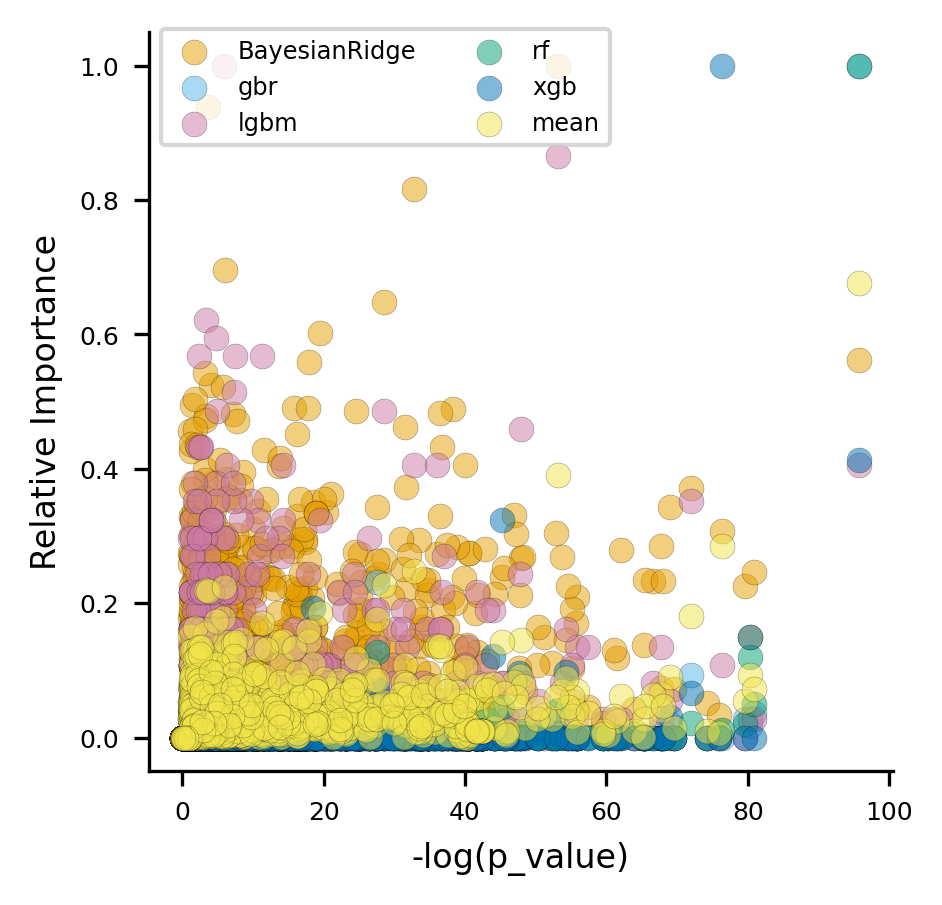

In [103]:
scatter_plot = plot_scatter(summary_result=sr, report_dir=report_dir)

In [104]:
%%time
mean_imp = mean_importance(top, report_dir=report_dir)

CPU times: total: 250 ms
Wall time: 224 ms


mean Done


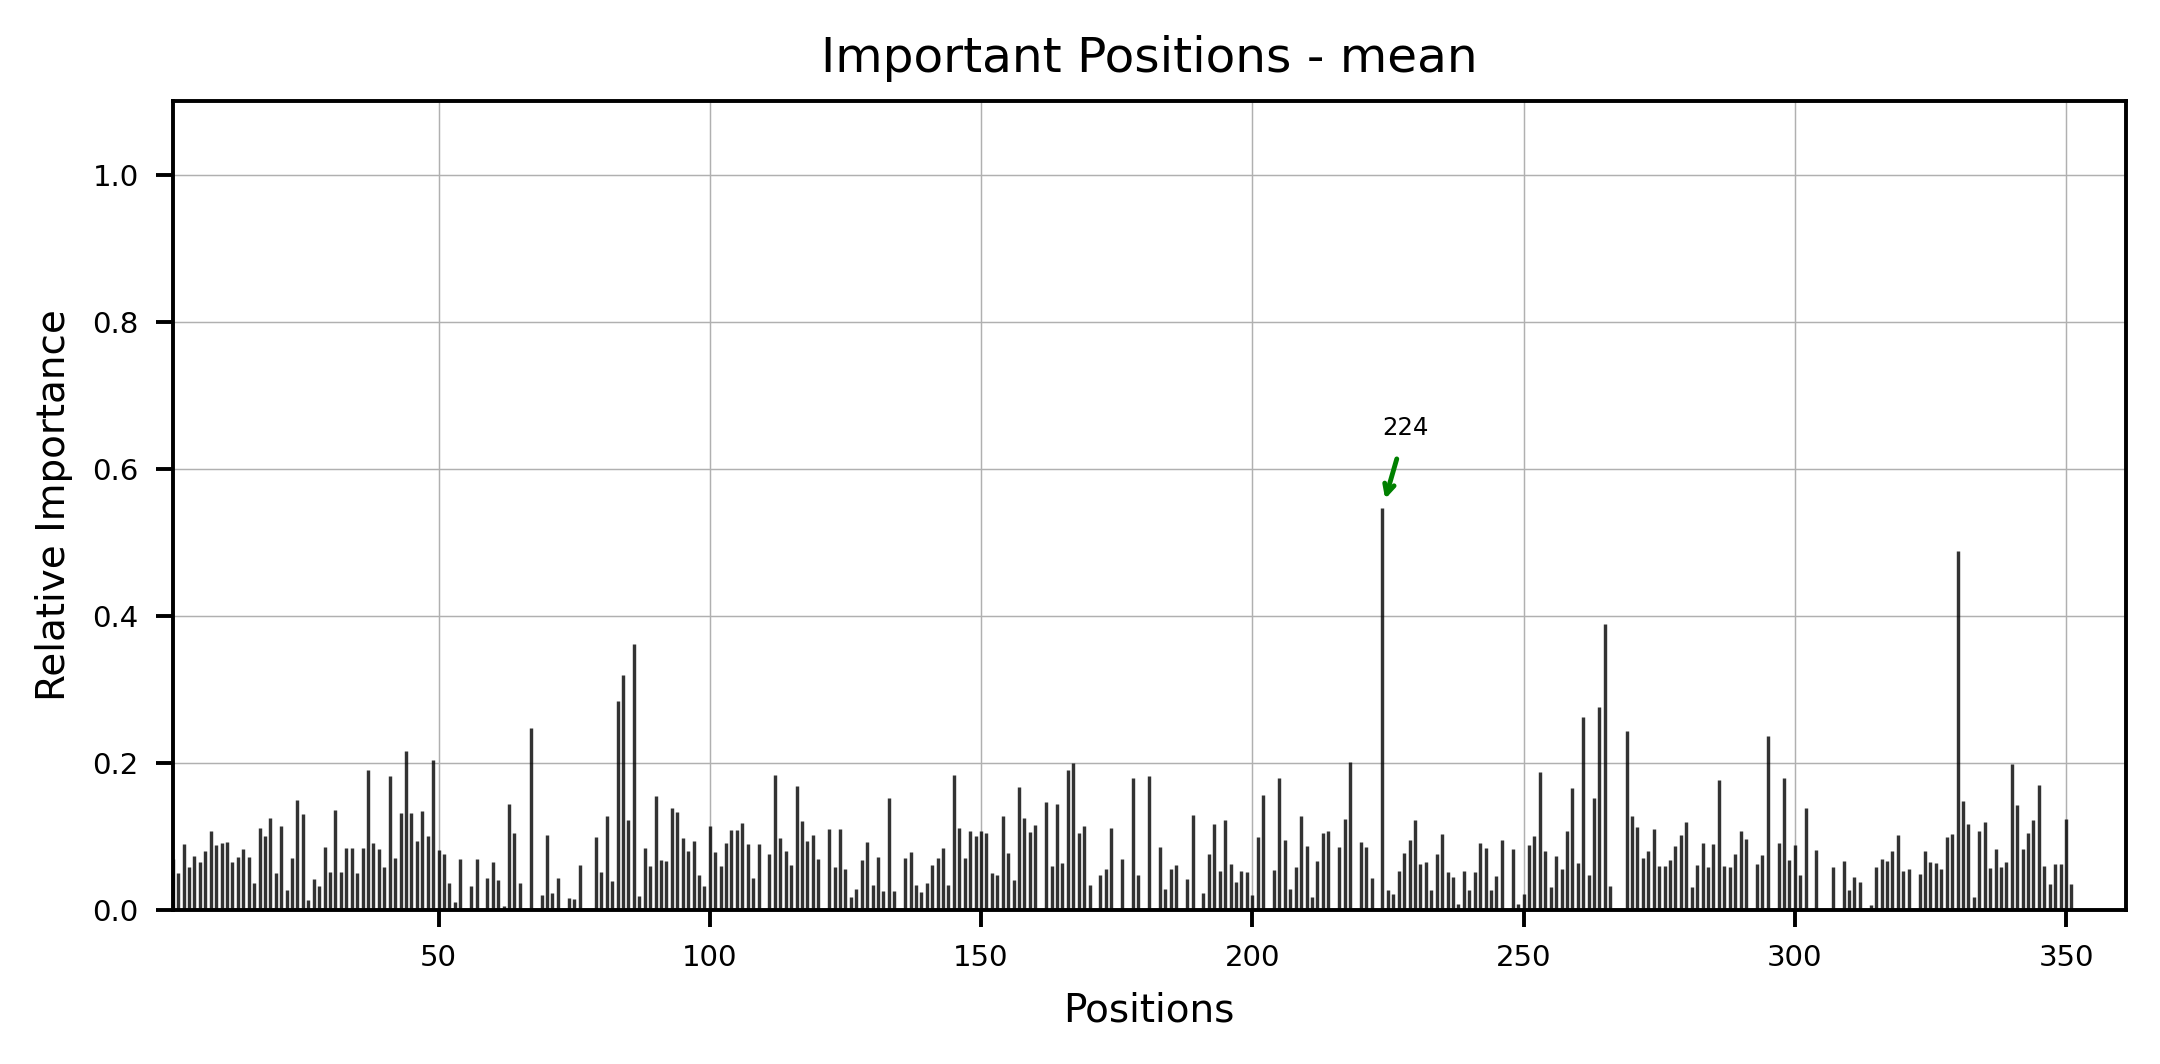

In [105]:
dp_plot(importance=mean_imp,imp_col='mean', model_name='mean', report_dir=report_dir)

In [106]:
test_copy = tr.copy()

In [107]:
test_copy = prep_pipeline[:4].fit_transform(tr)

BayesianRidge Done
BayesianRidge  Done
gbr Done
gbr  Done
lgbm Done
lgbm  Done
rf Done
rf  Done
xgb Done
xgb  Done


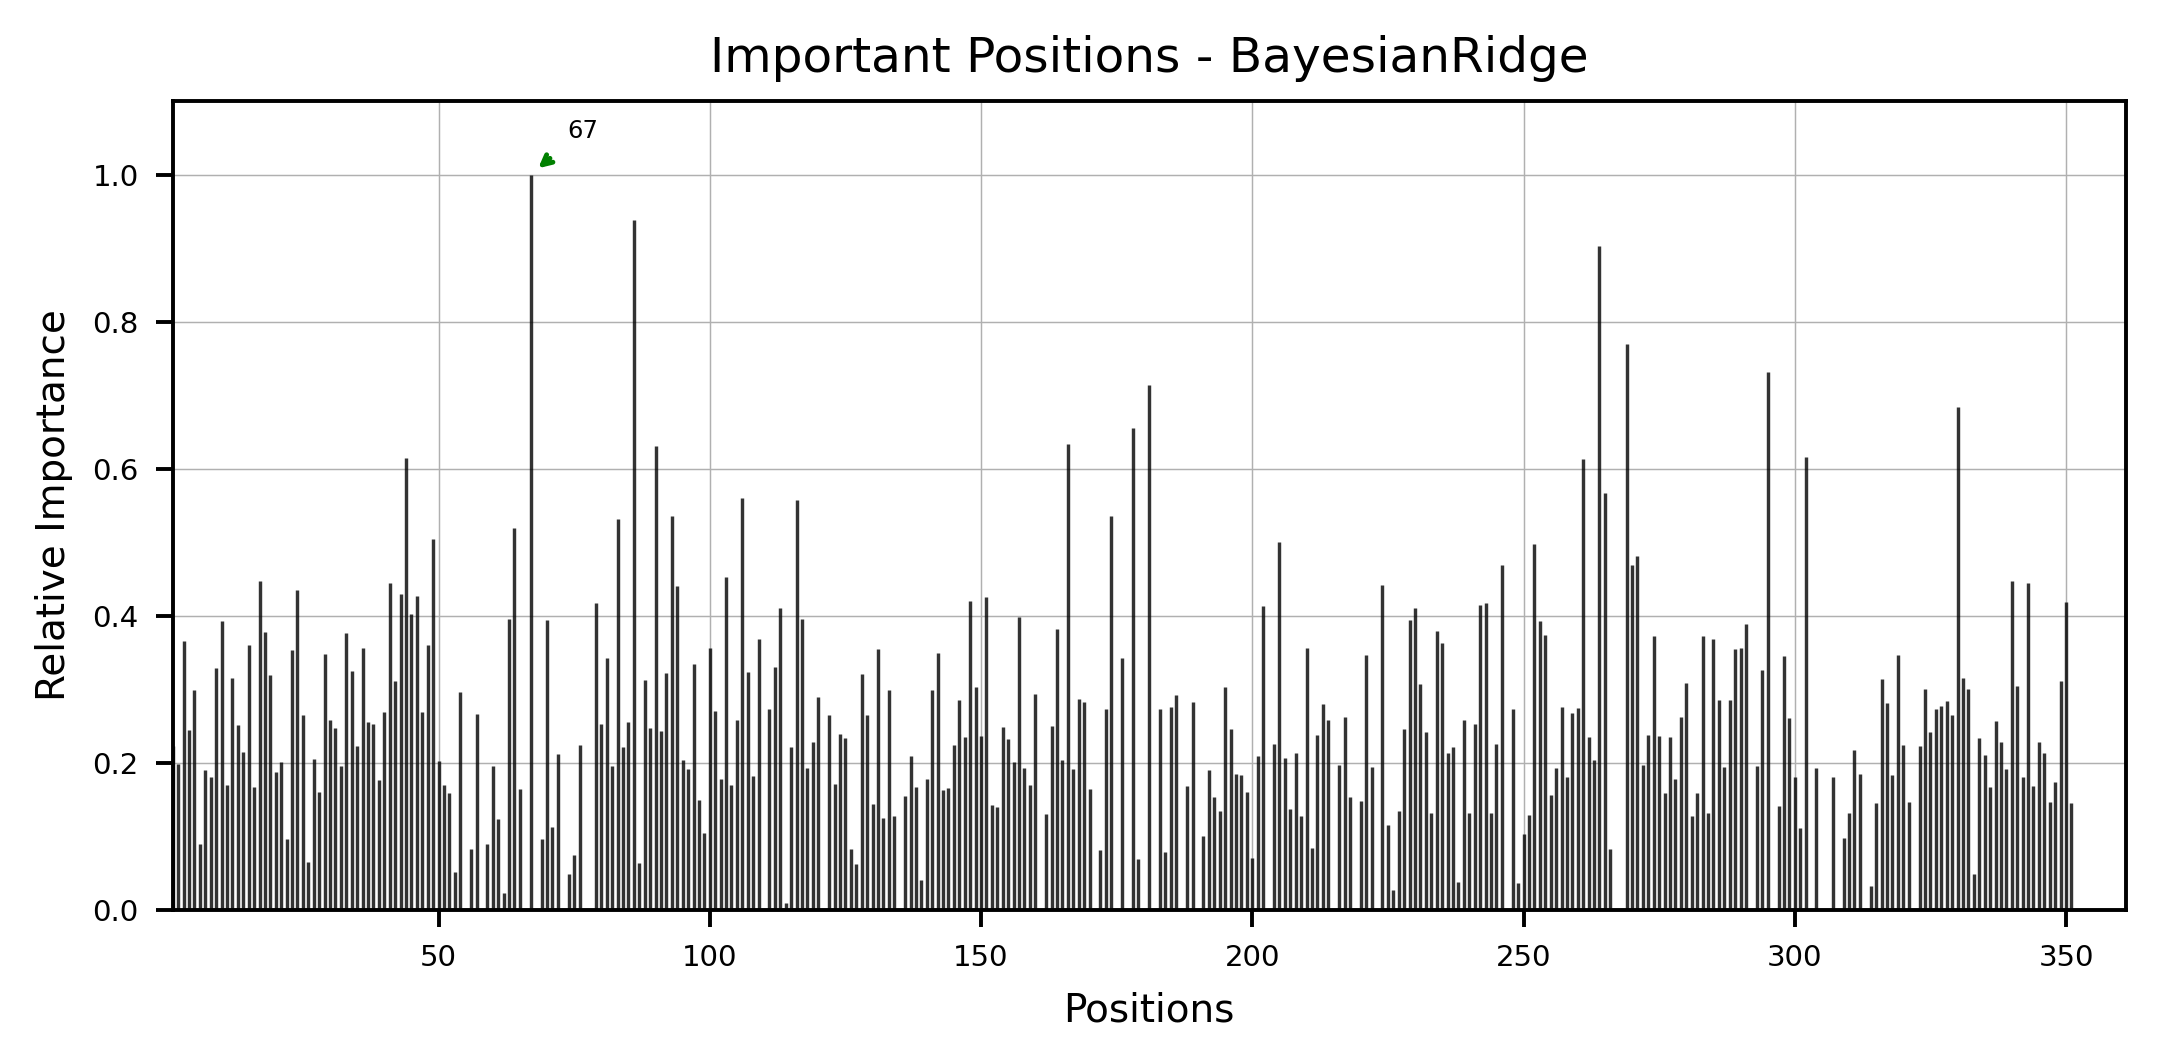

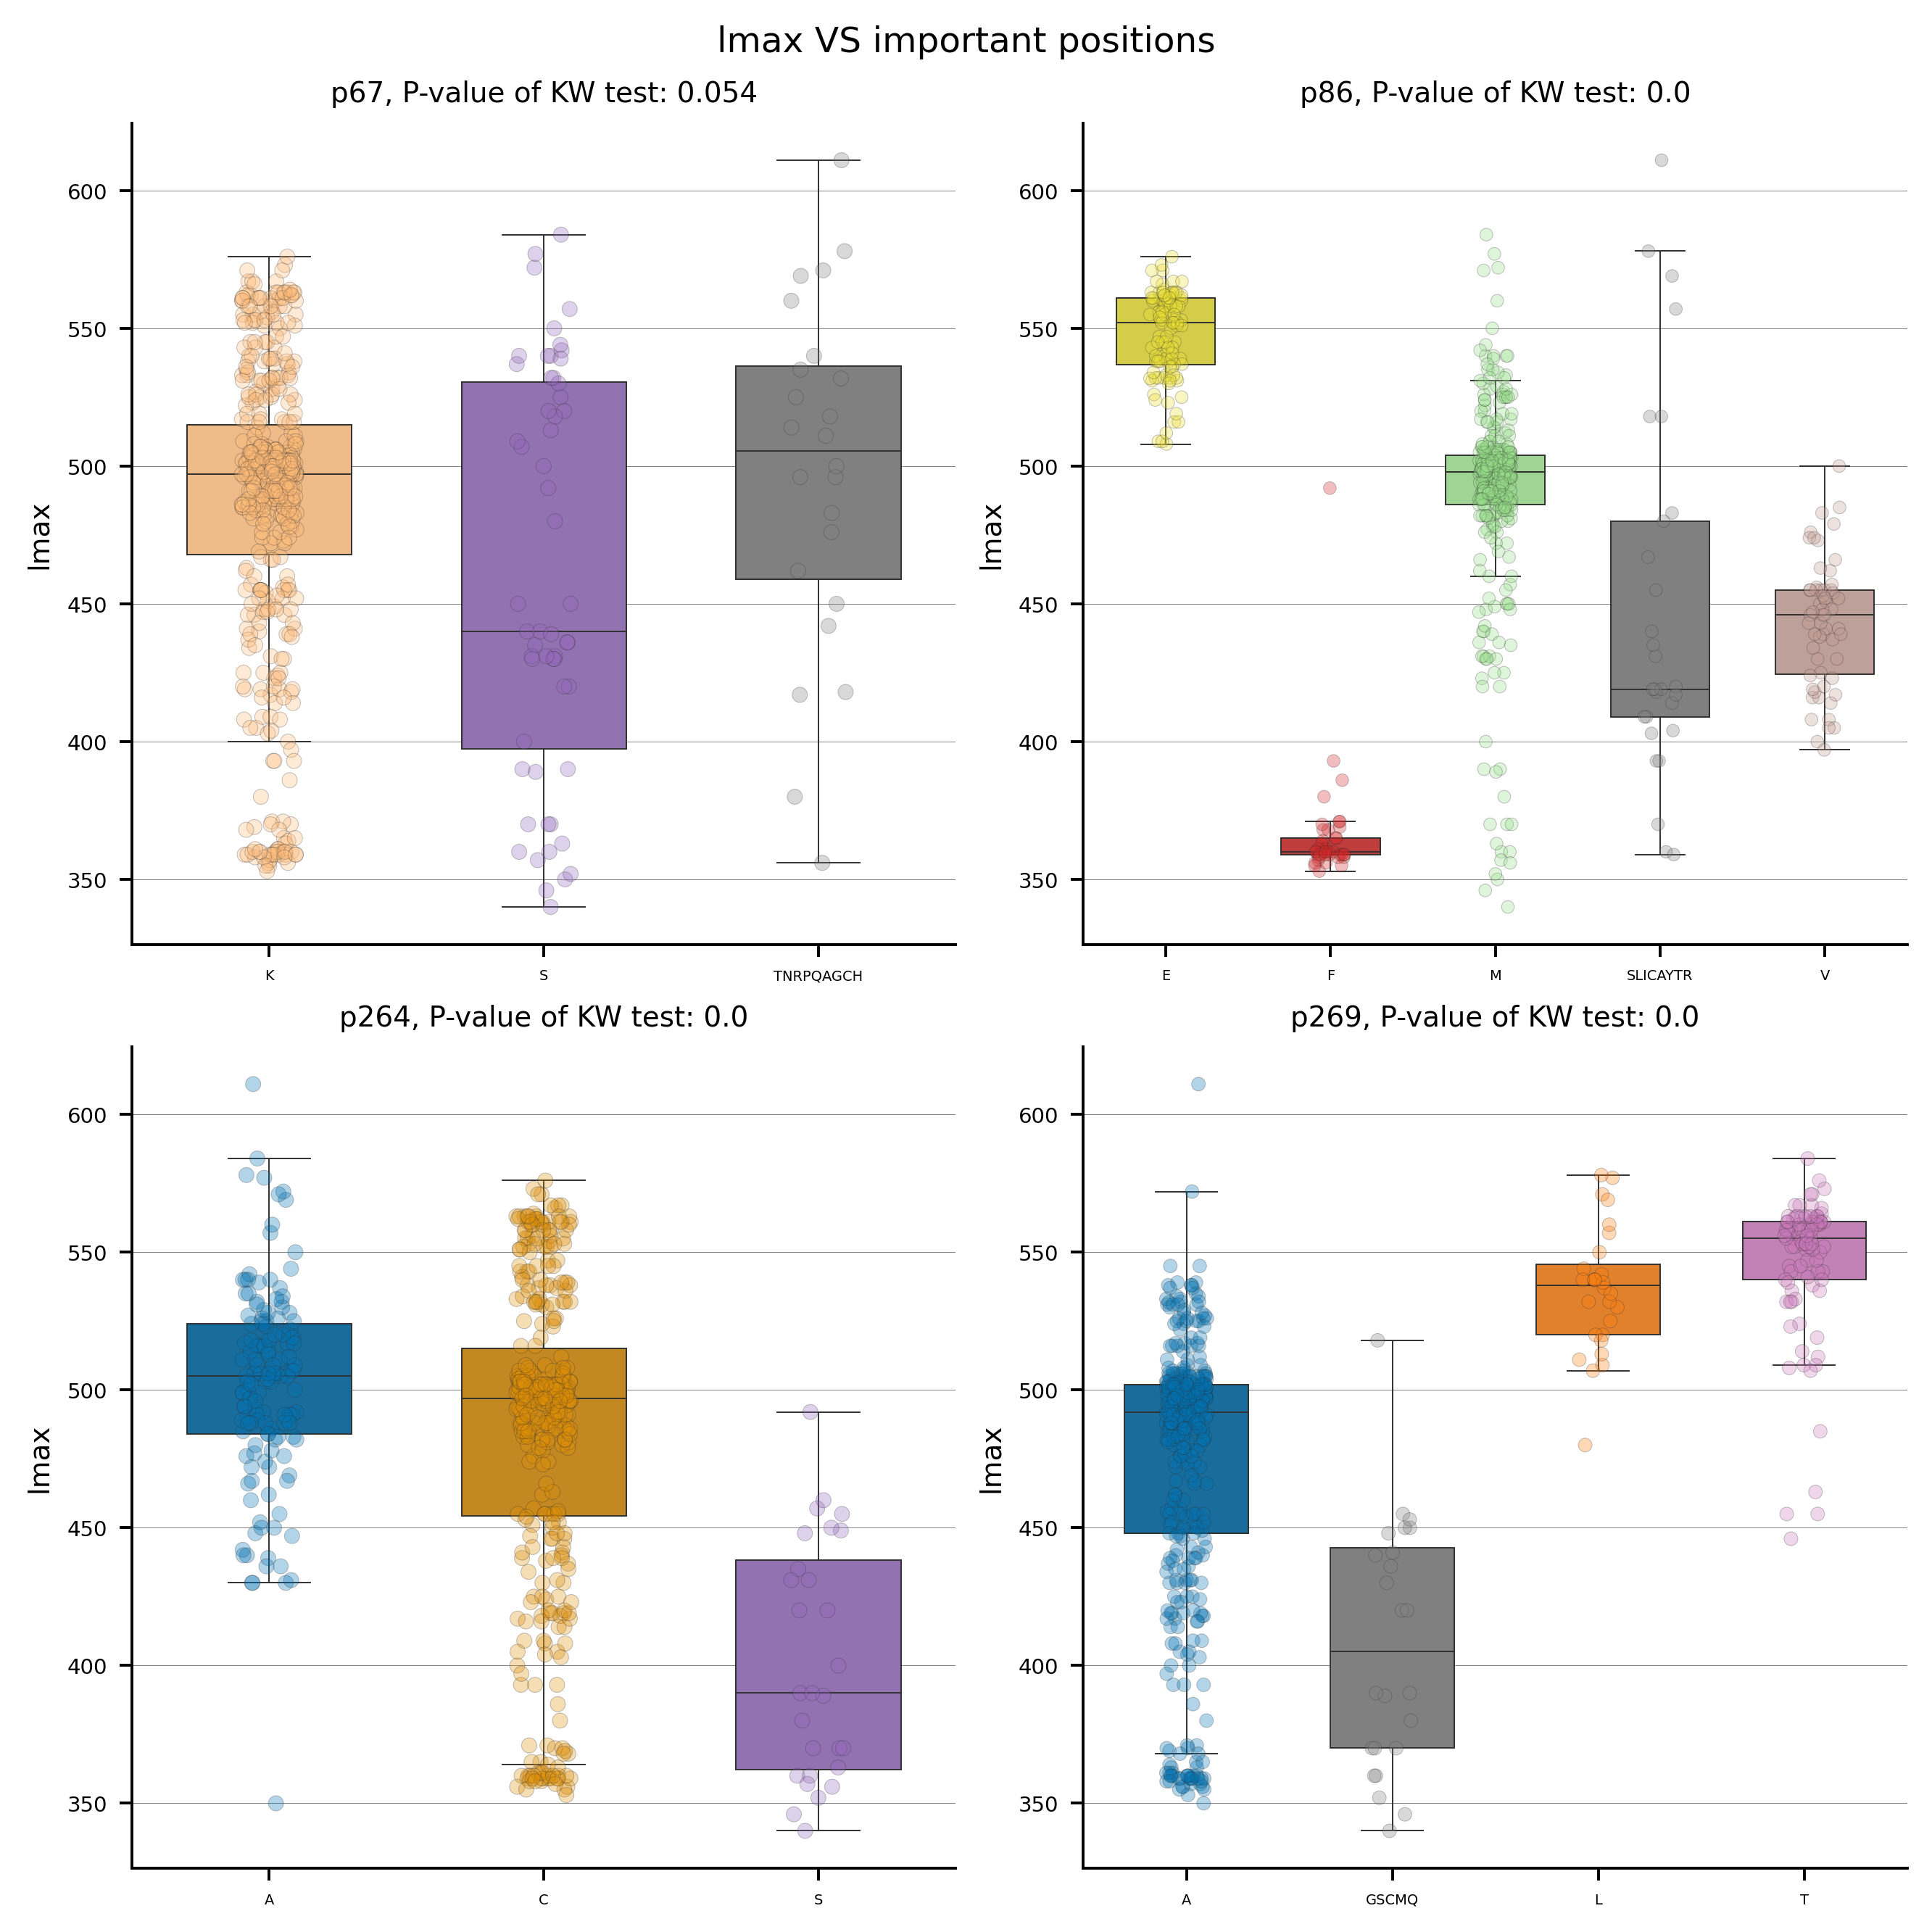

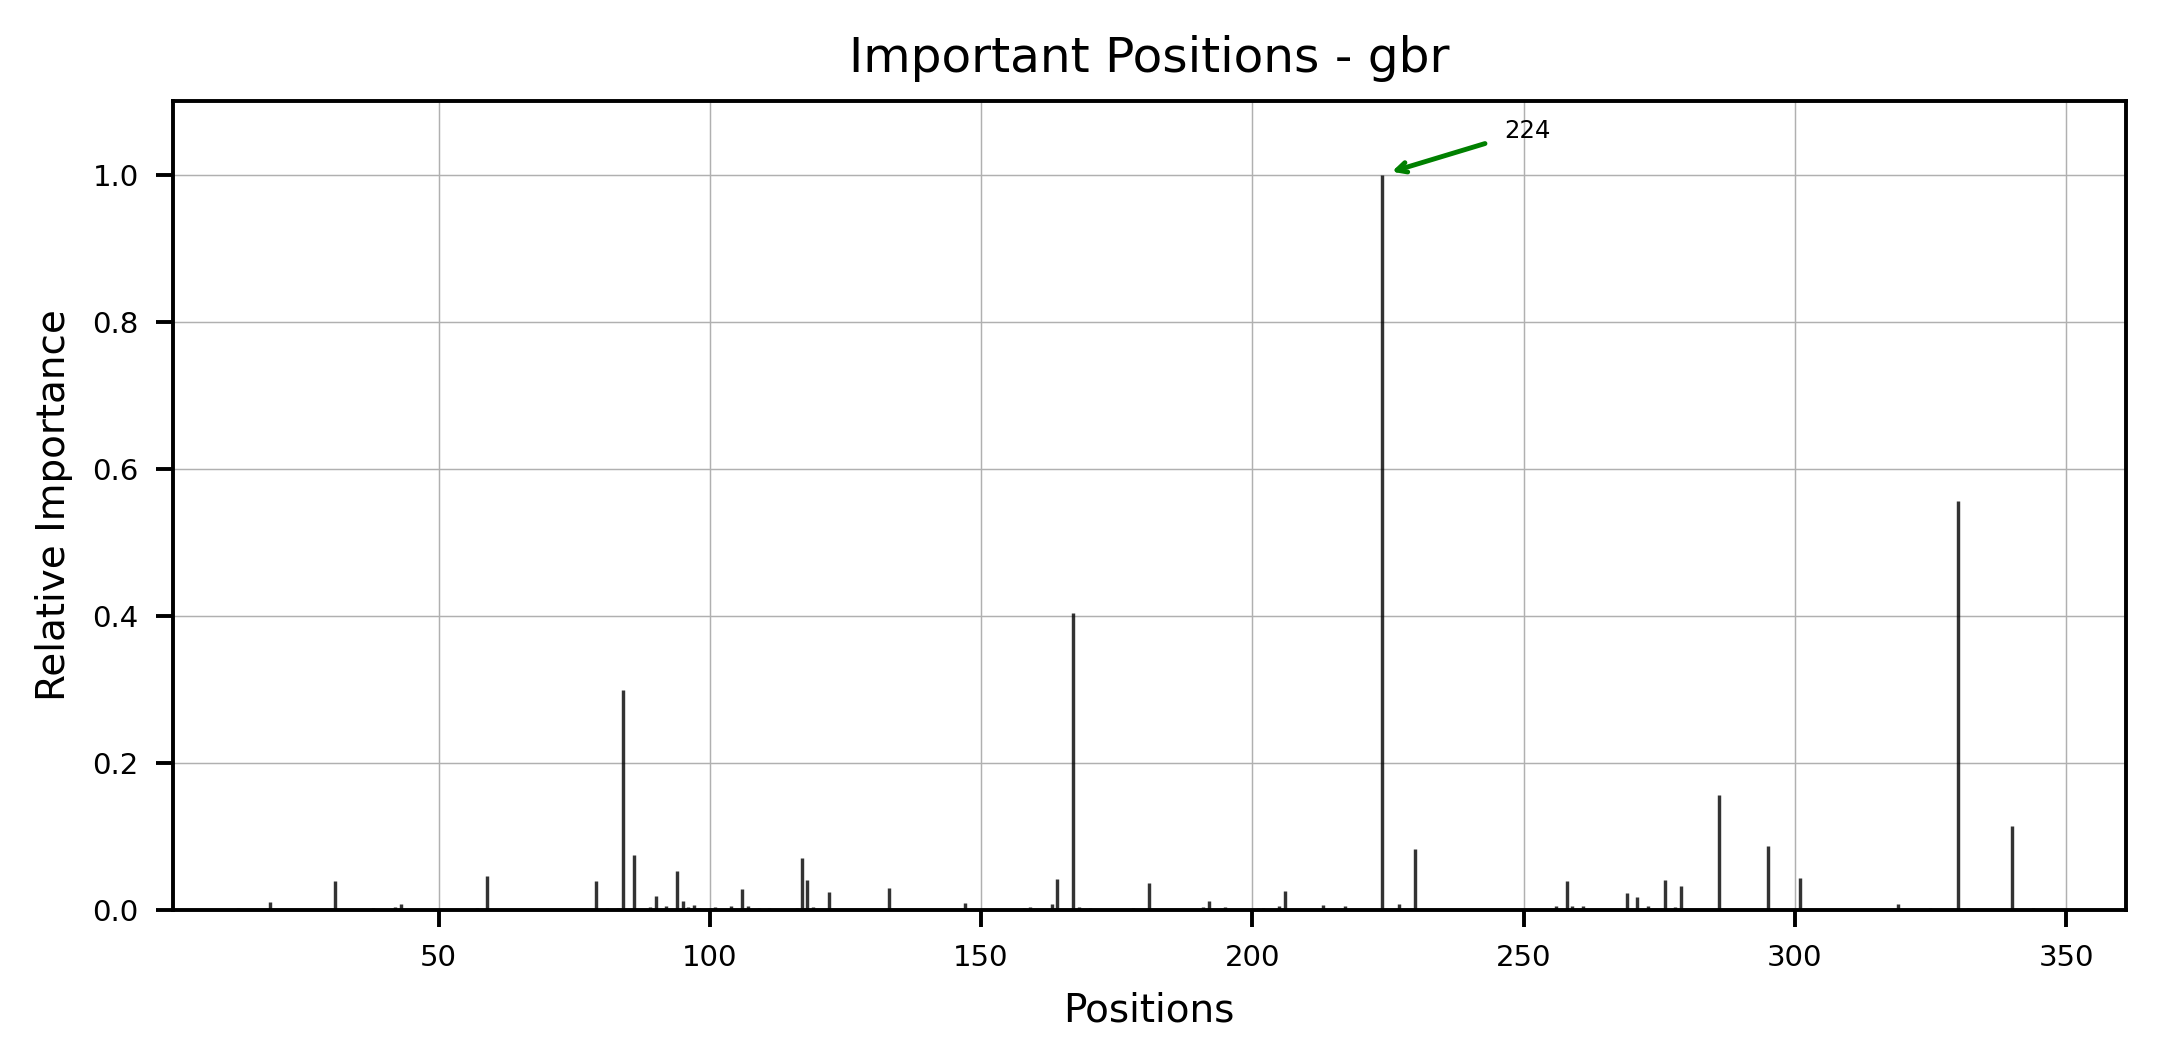

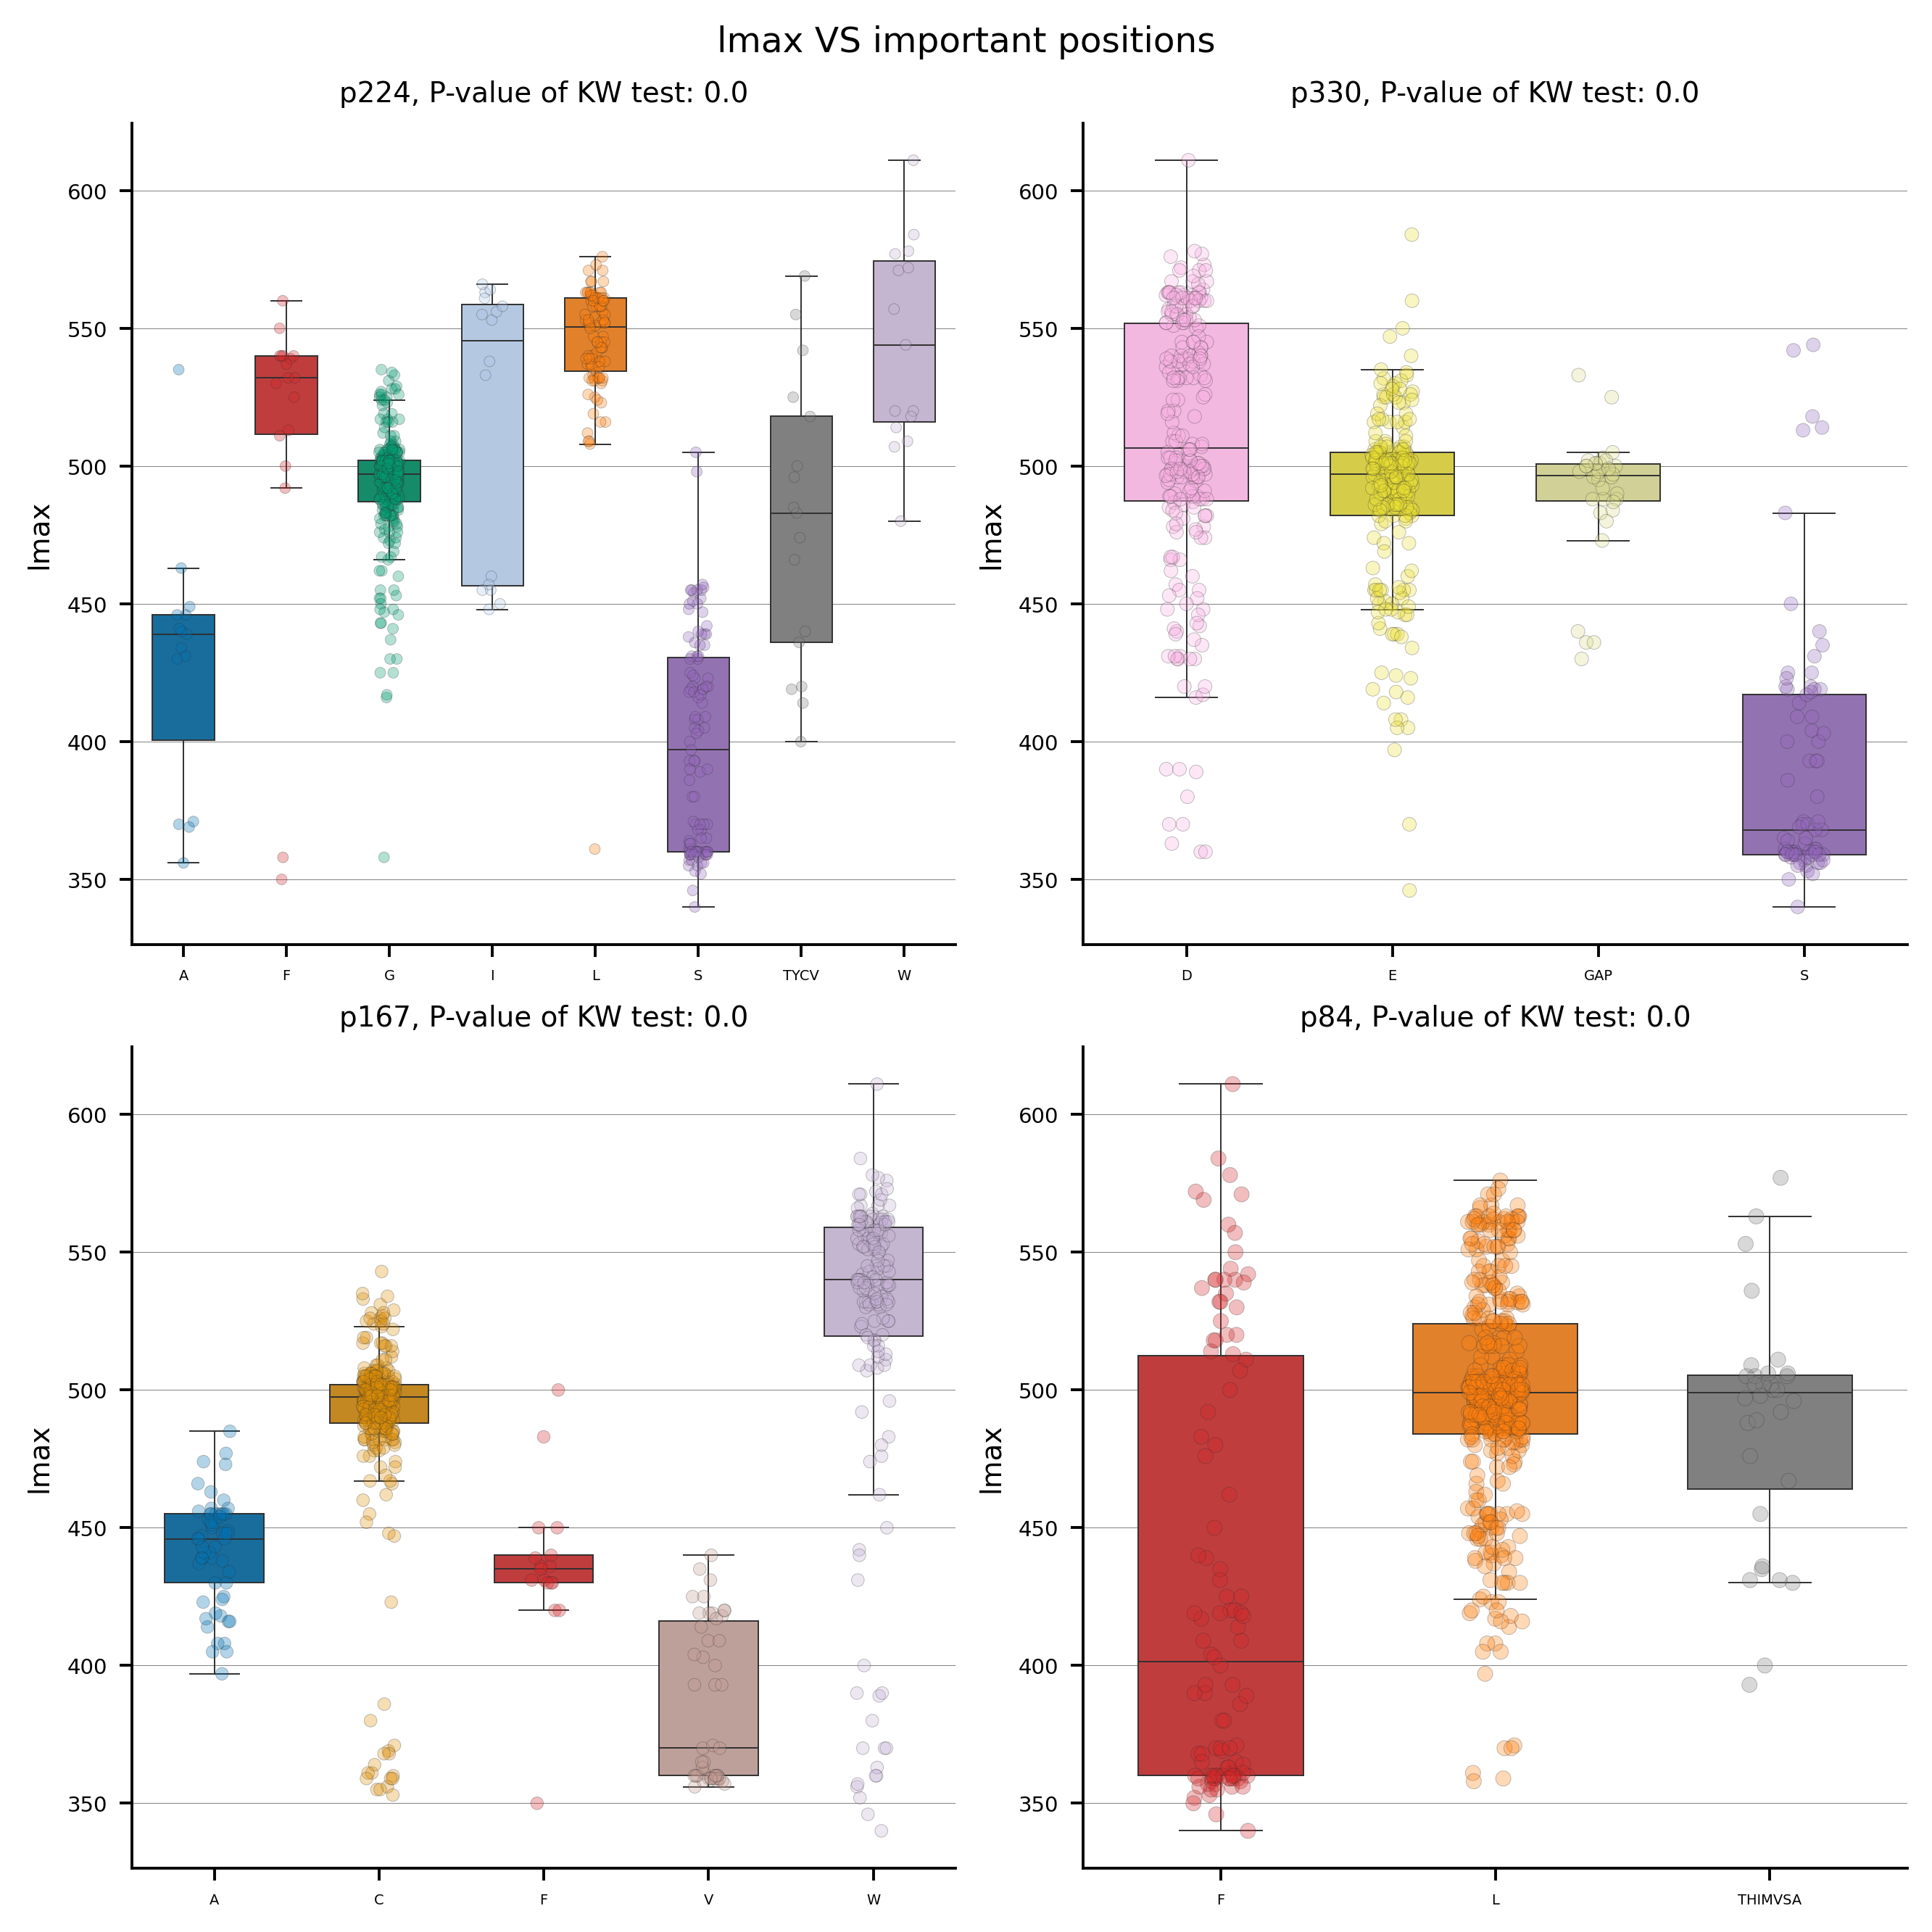

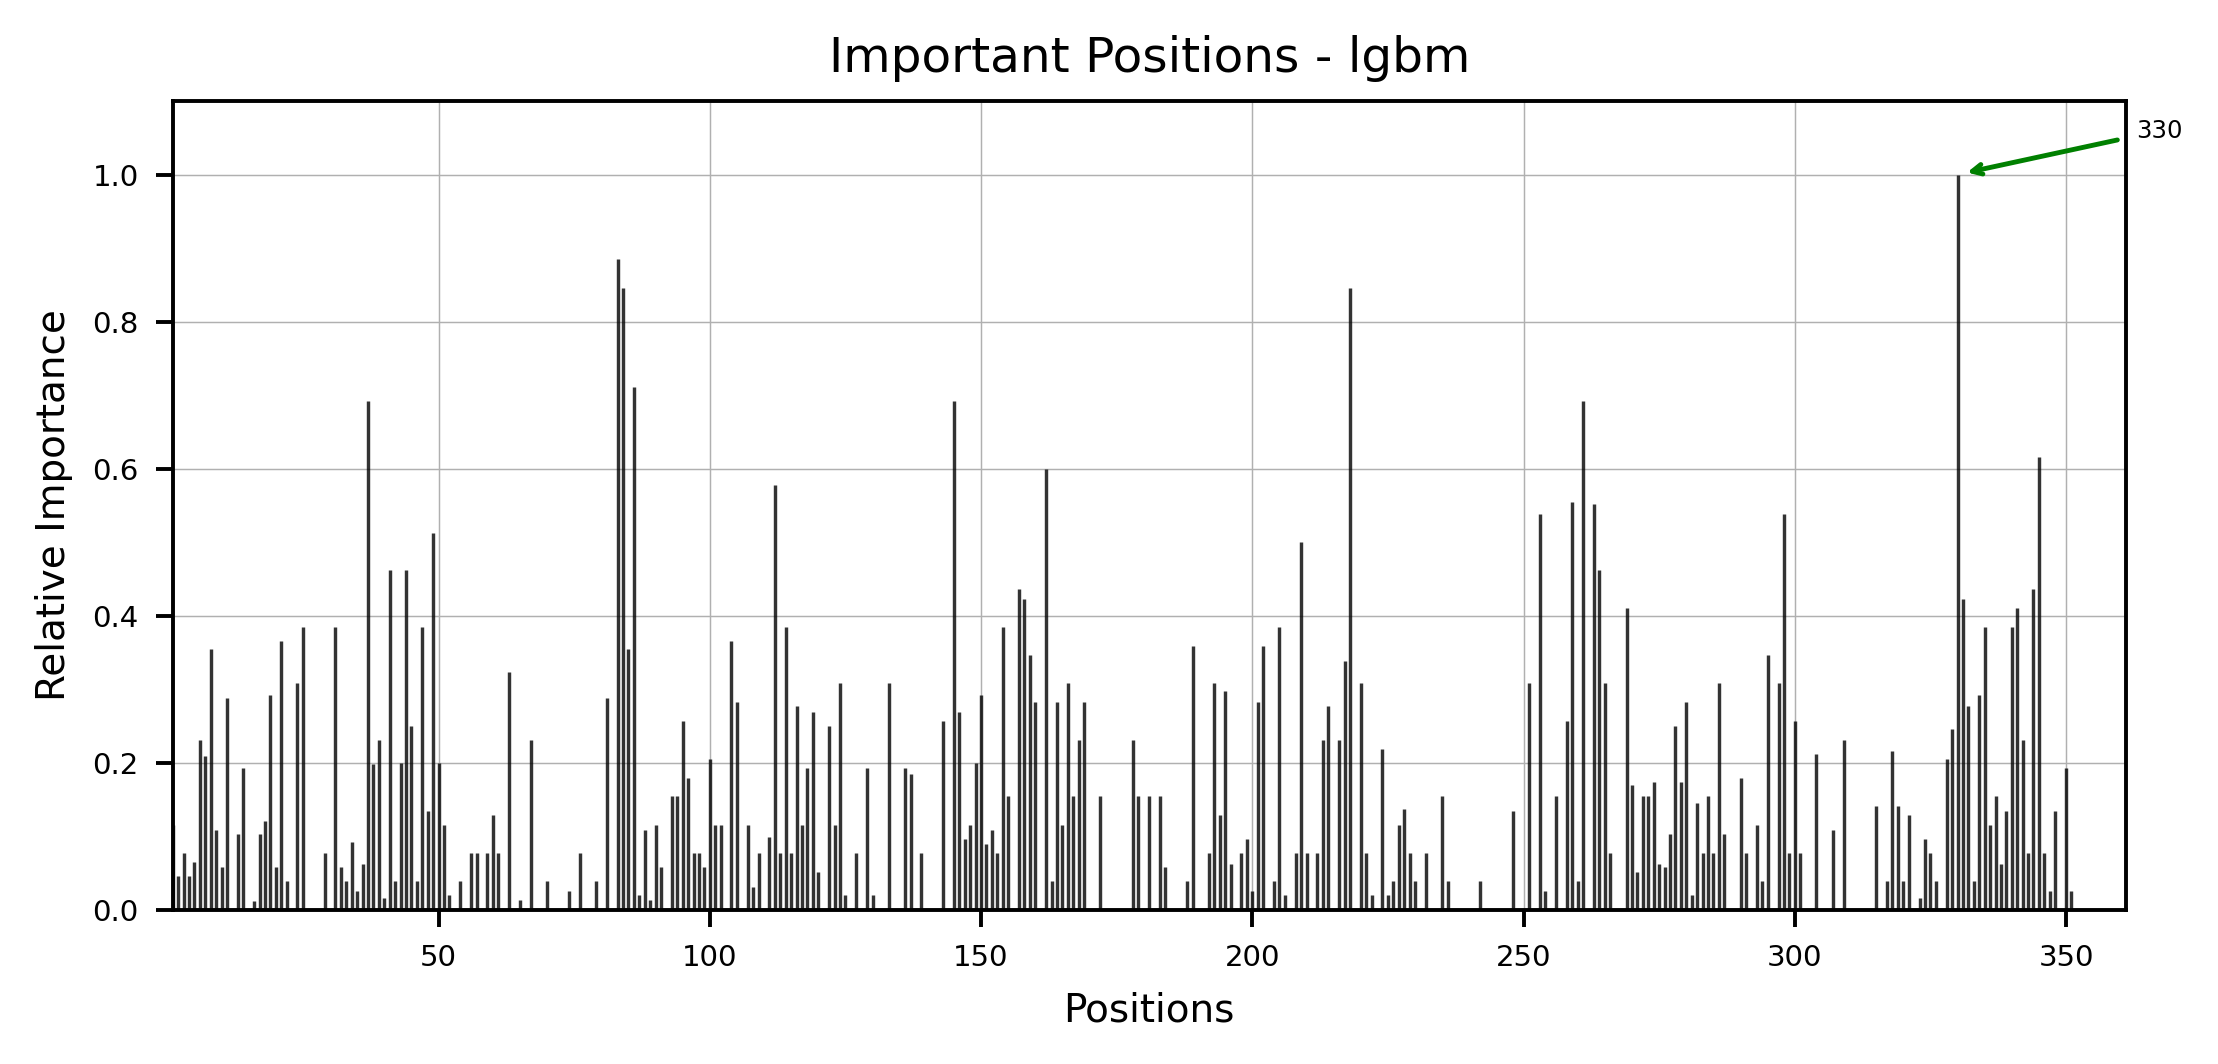

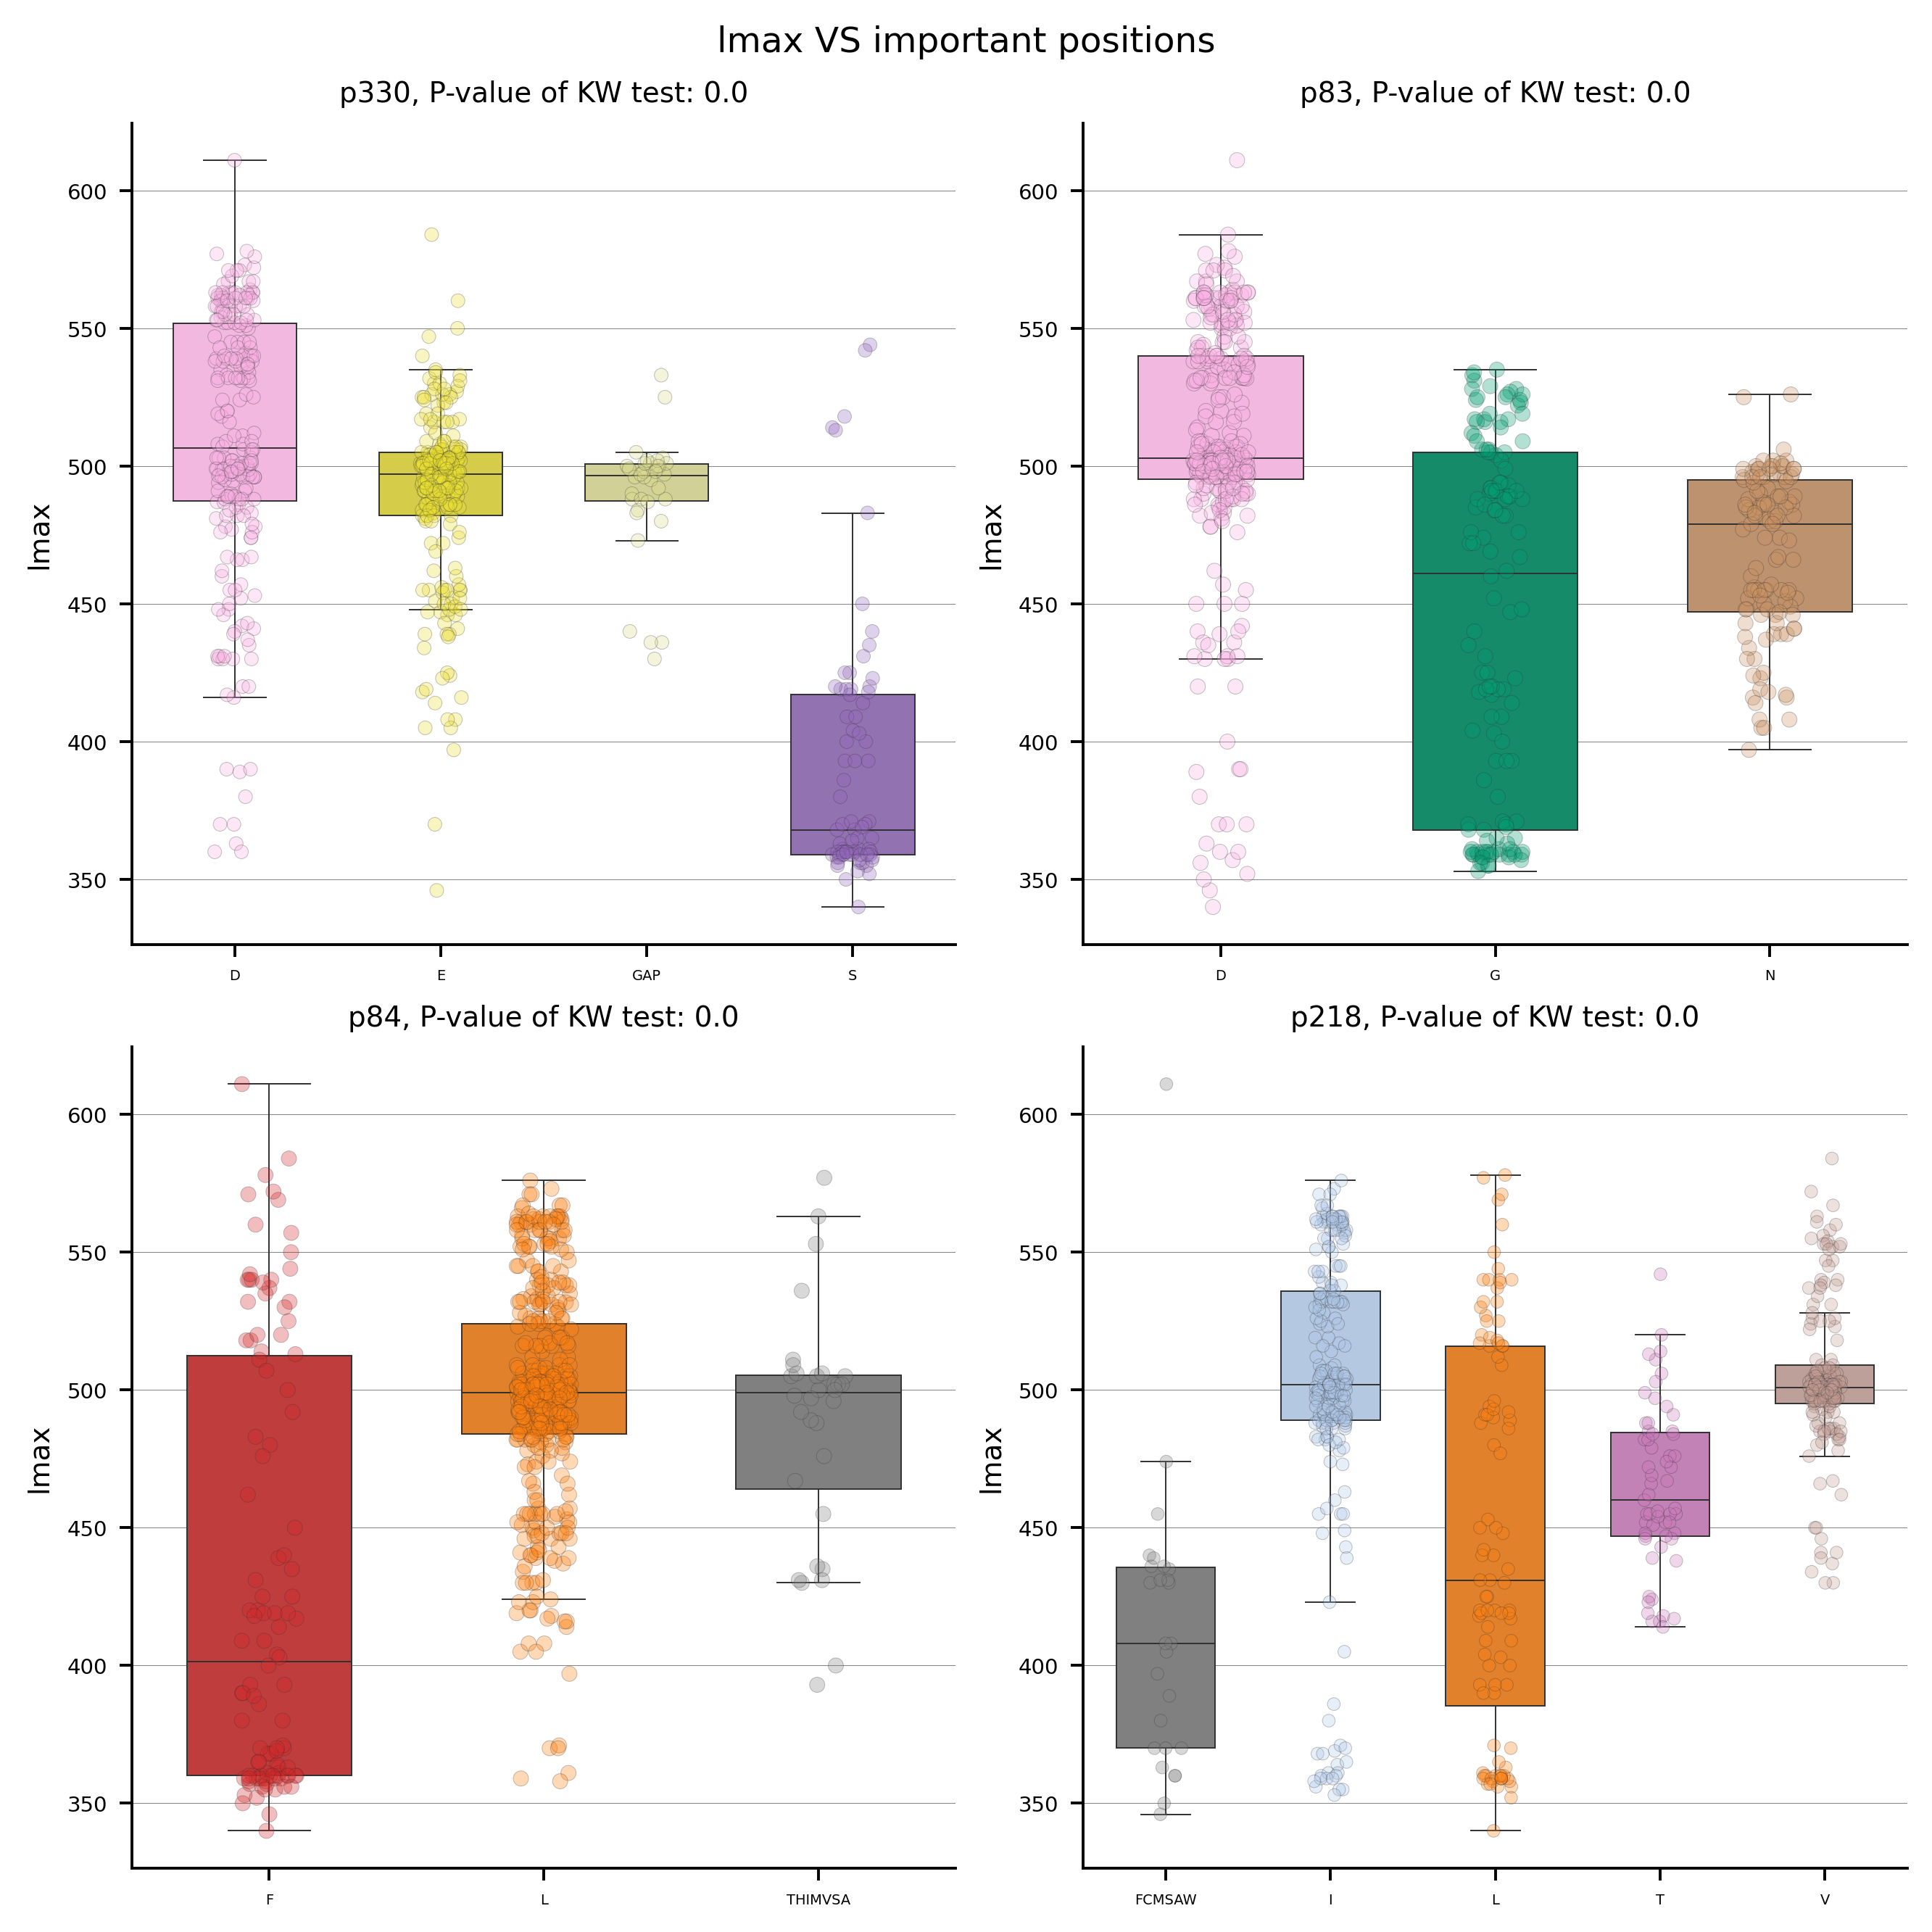

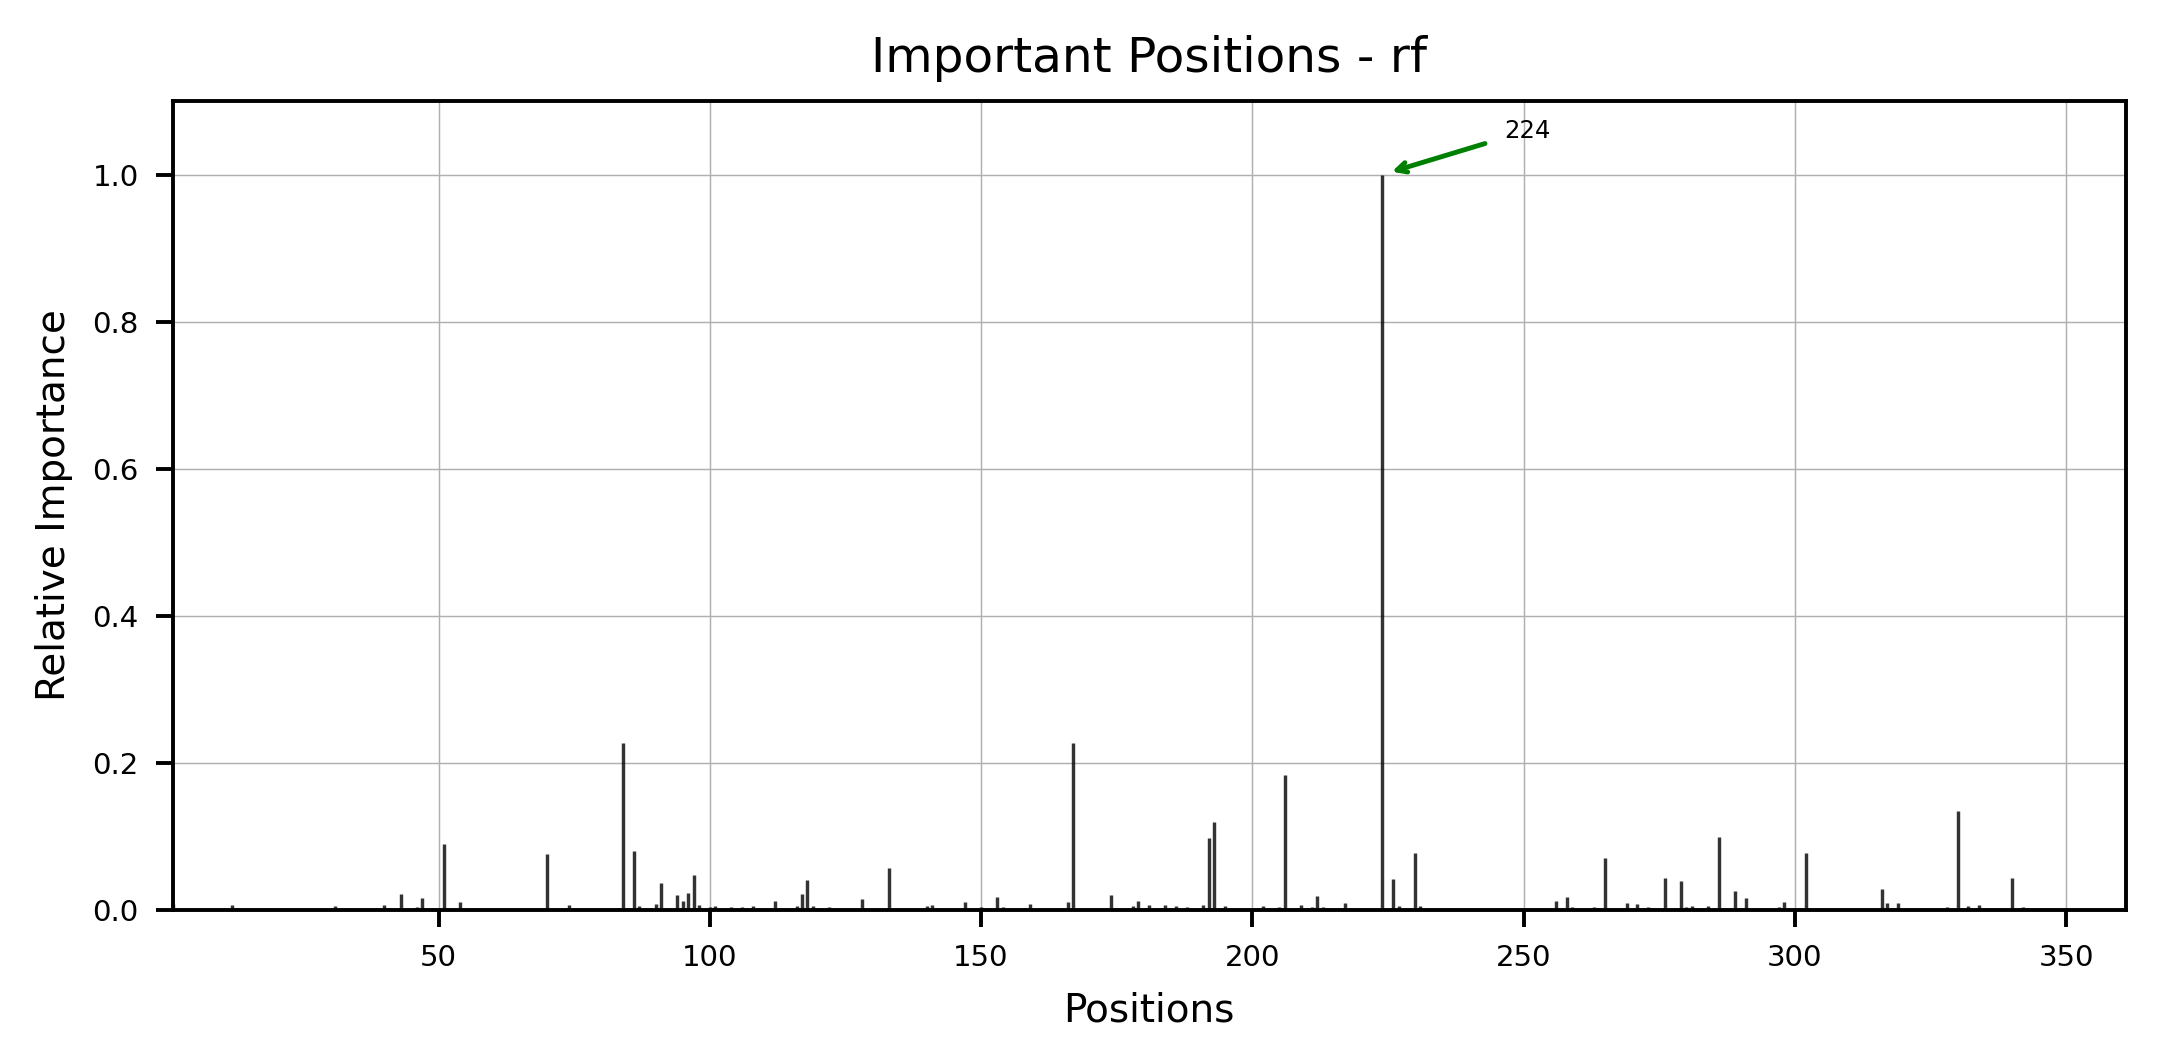

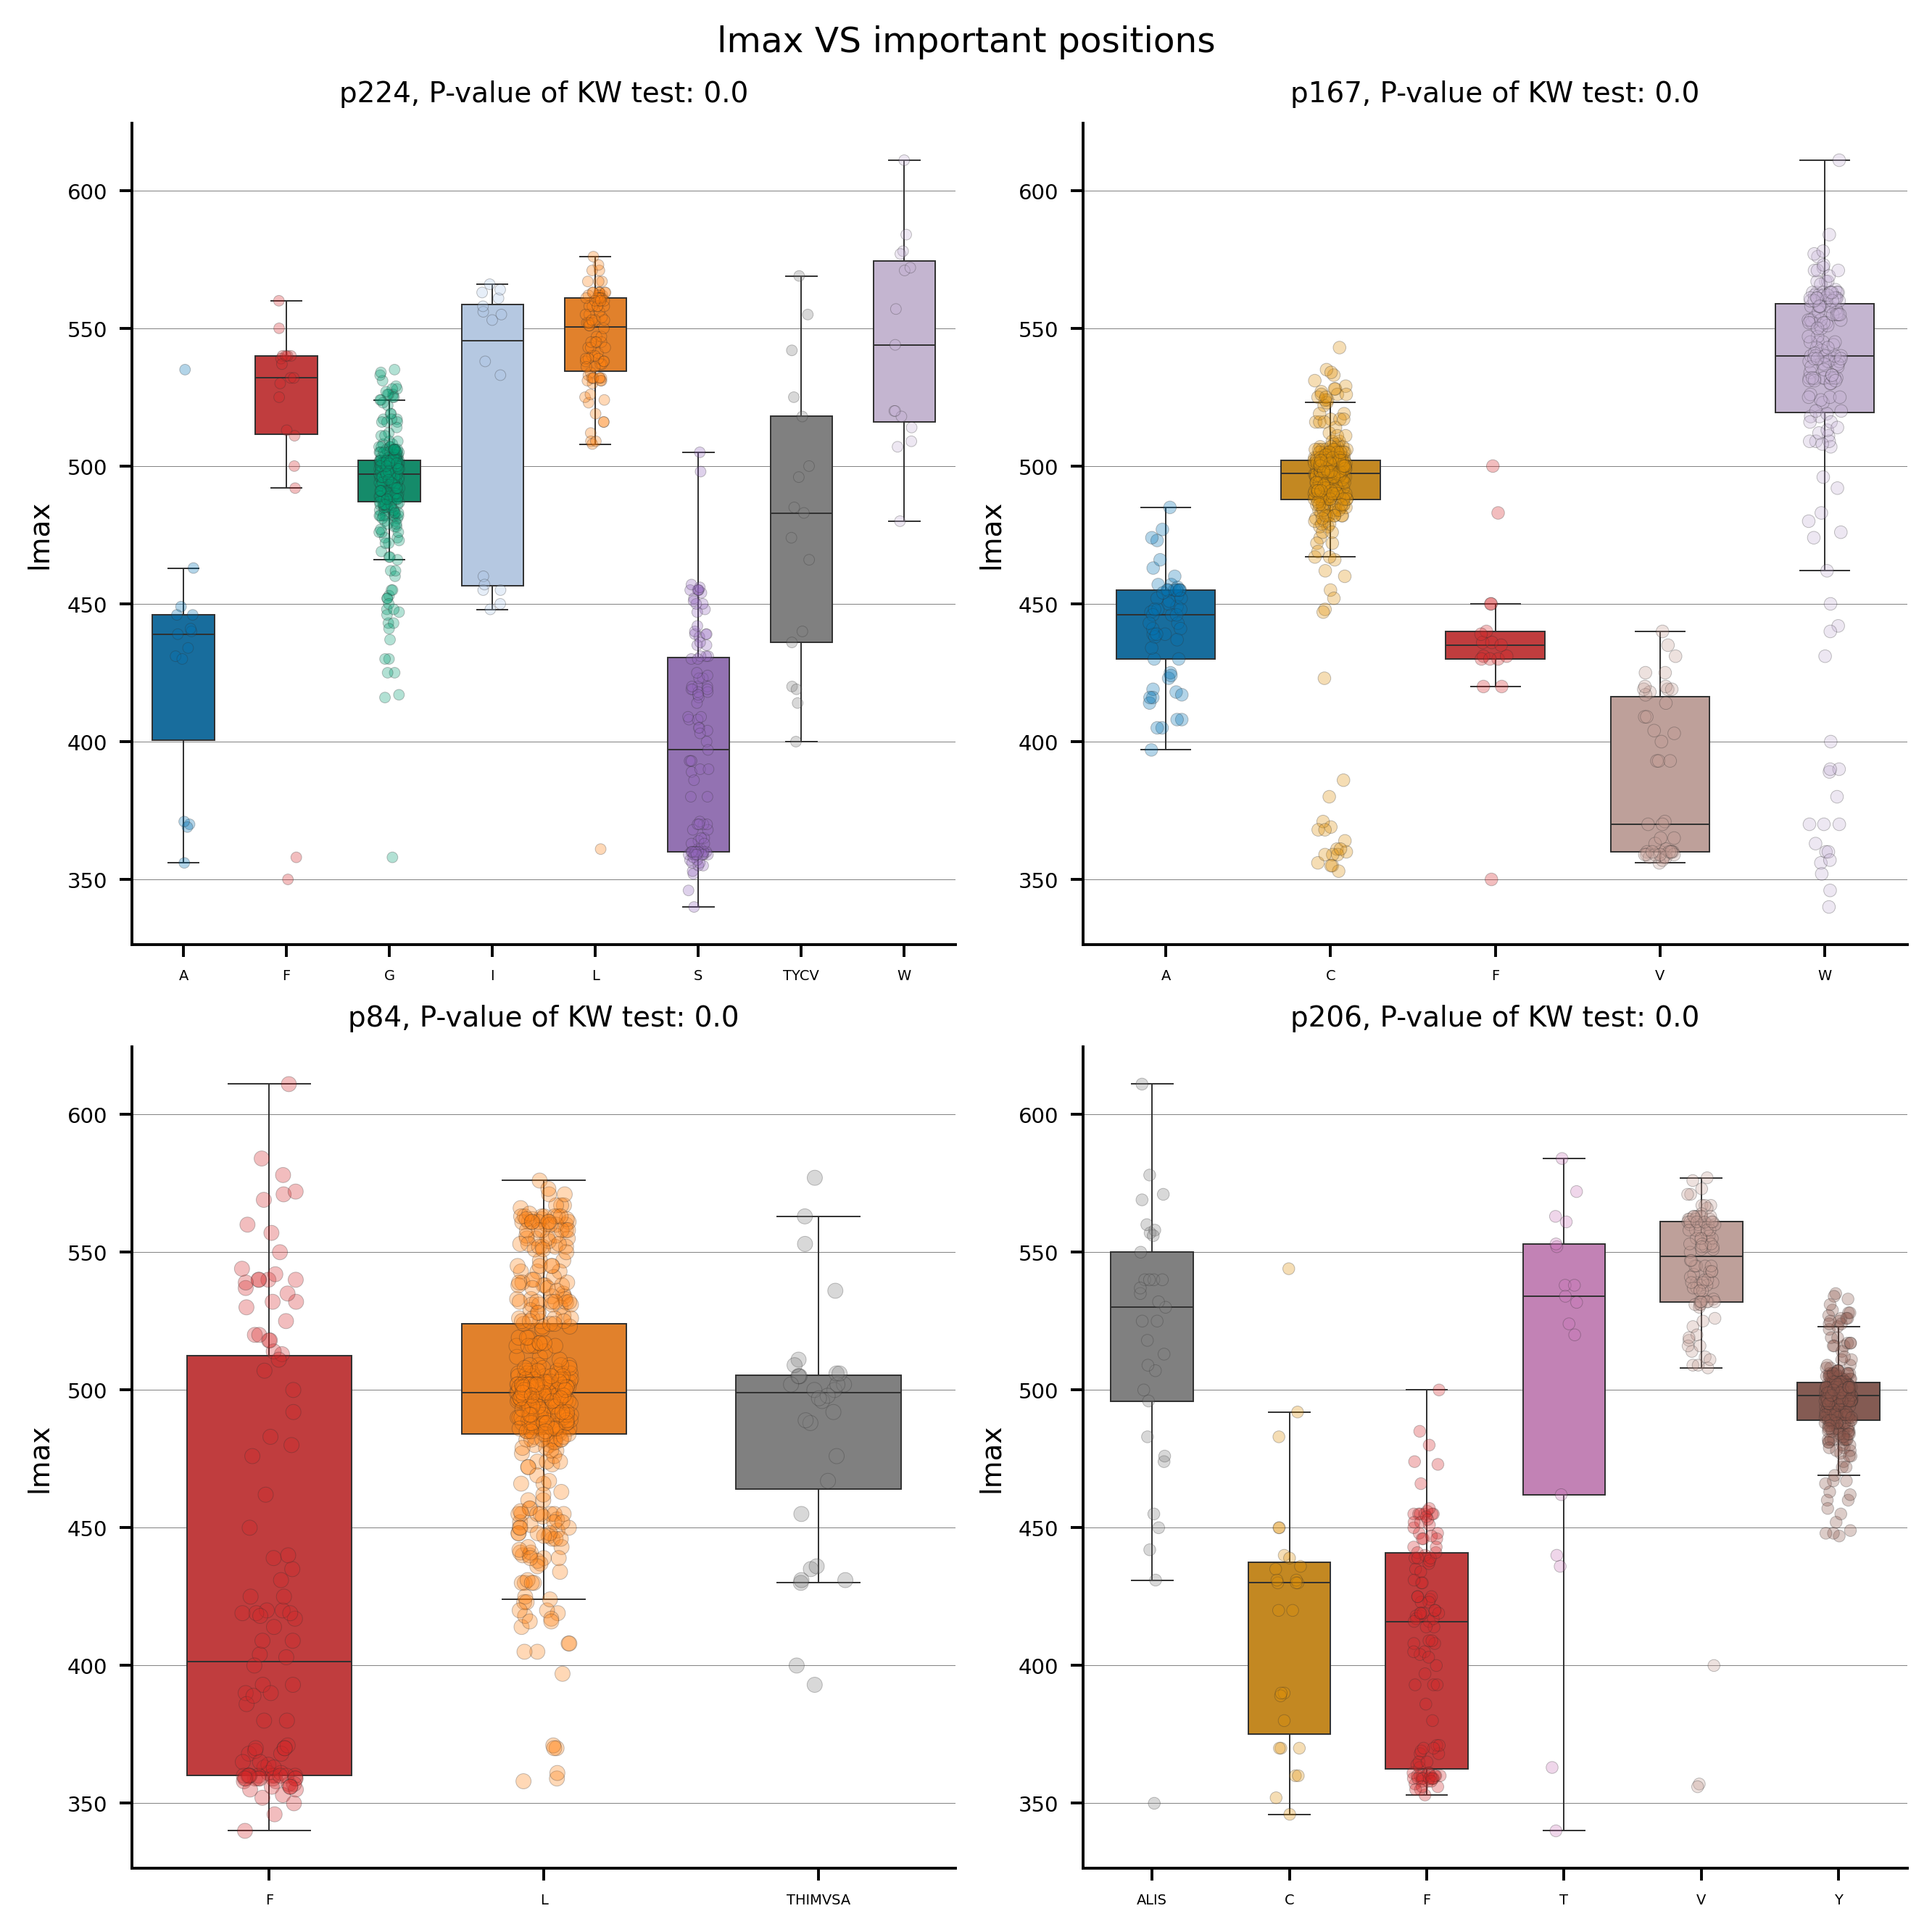

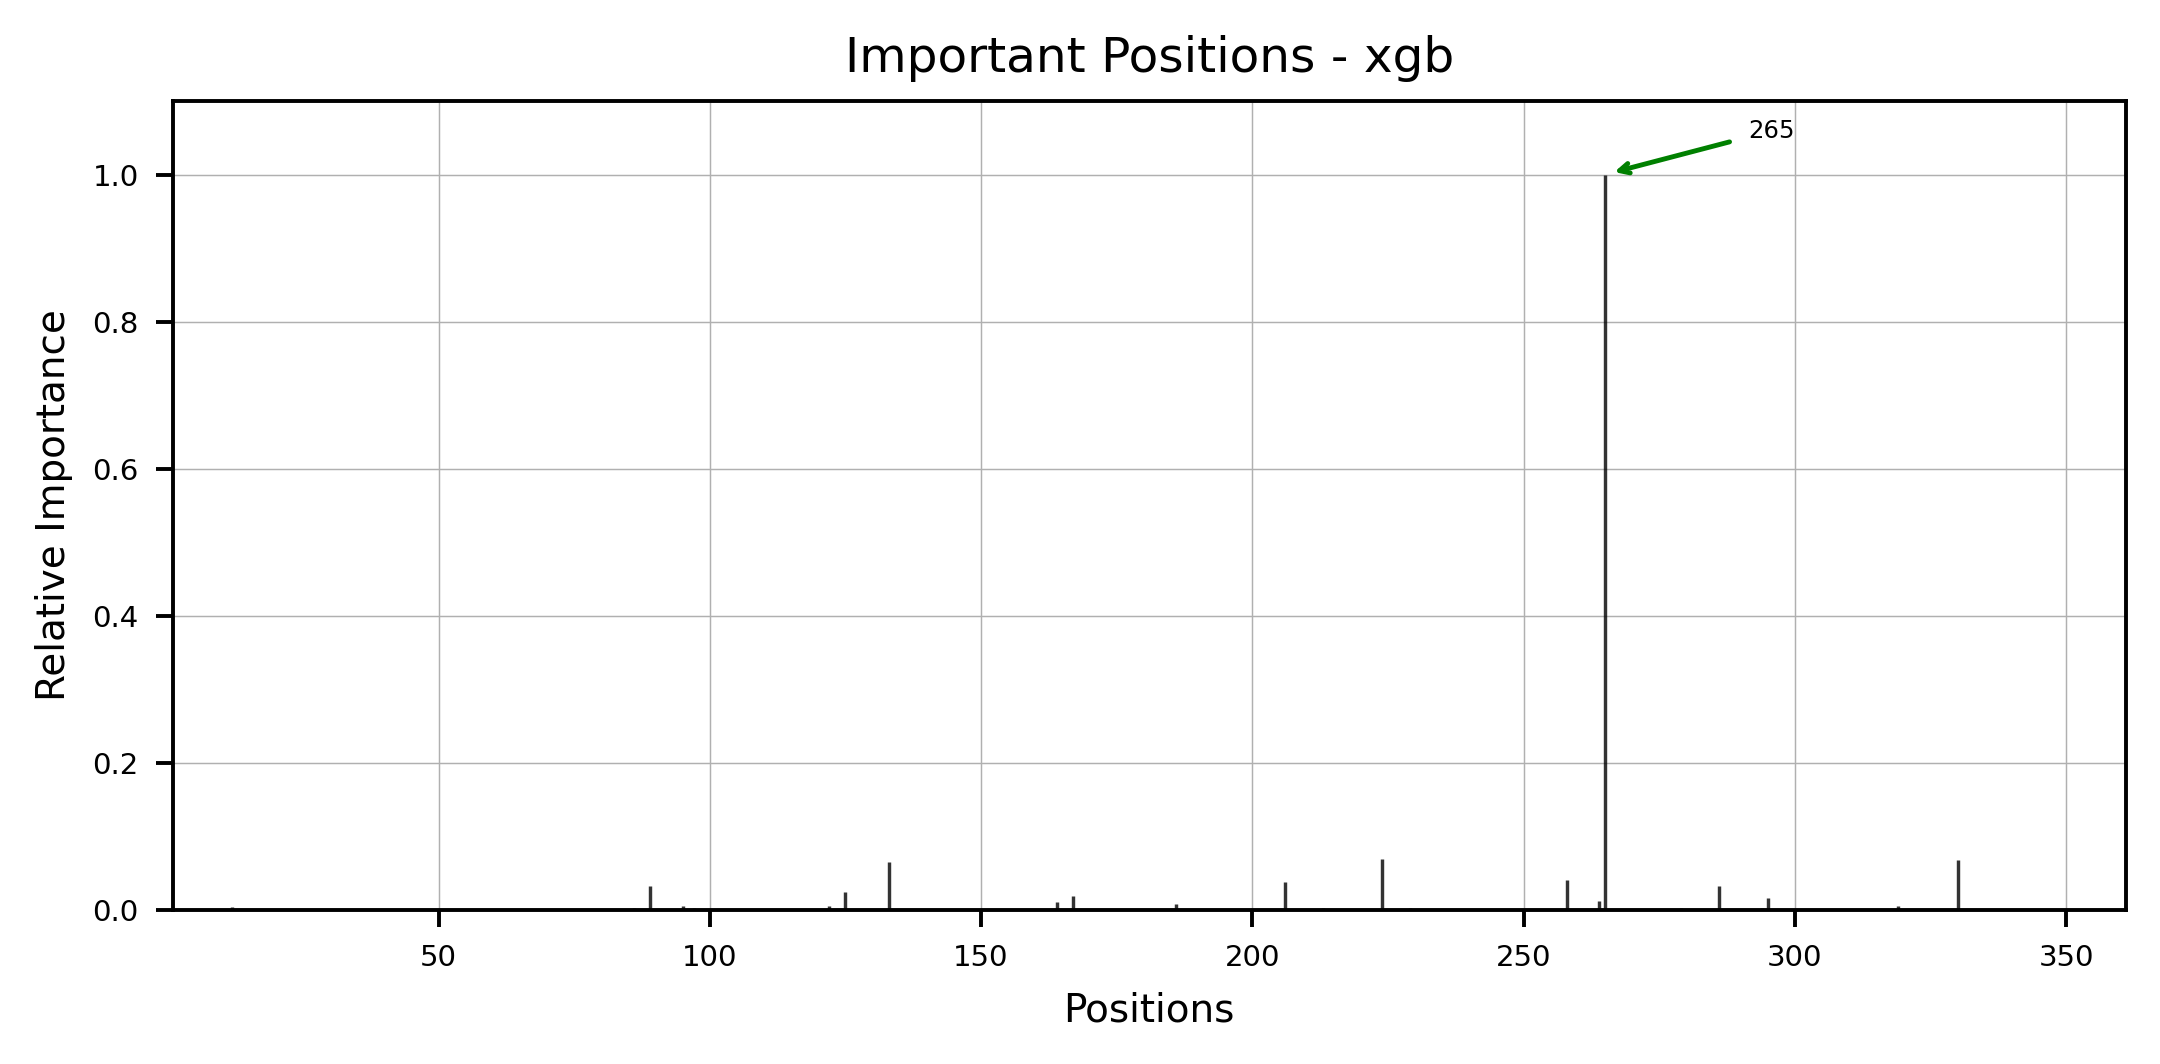

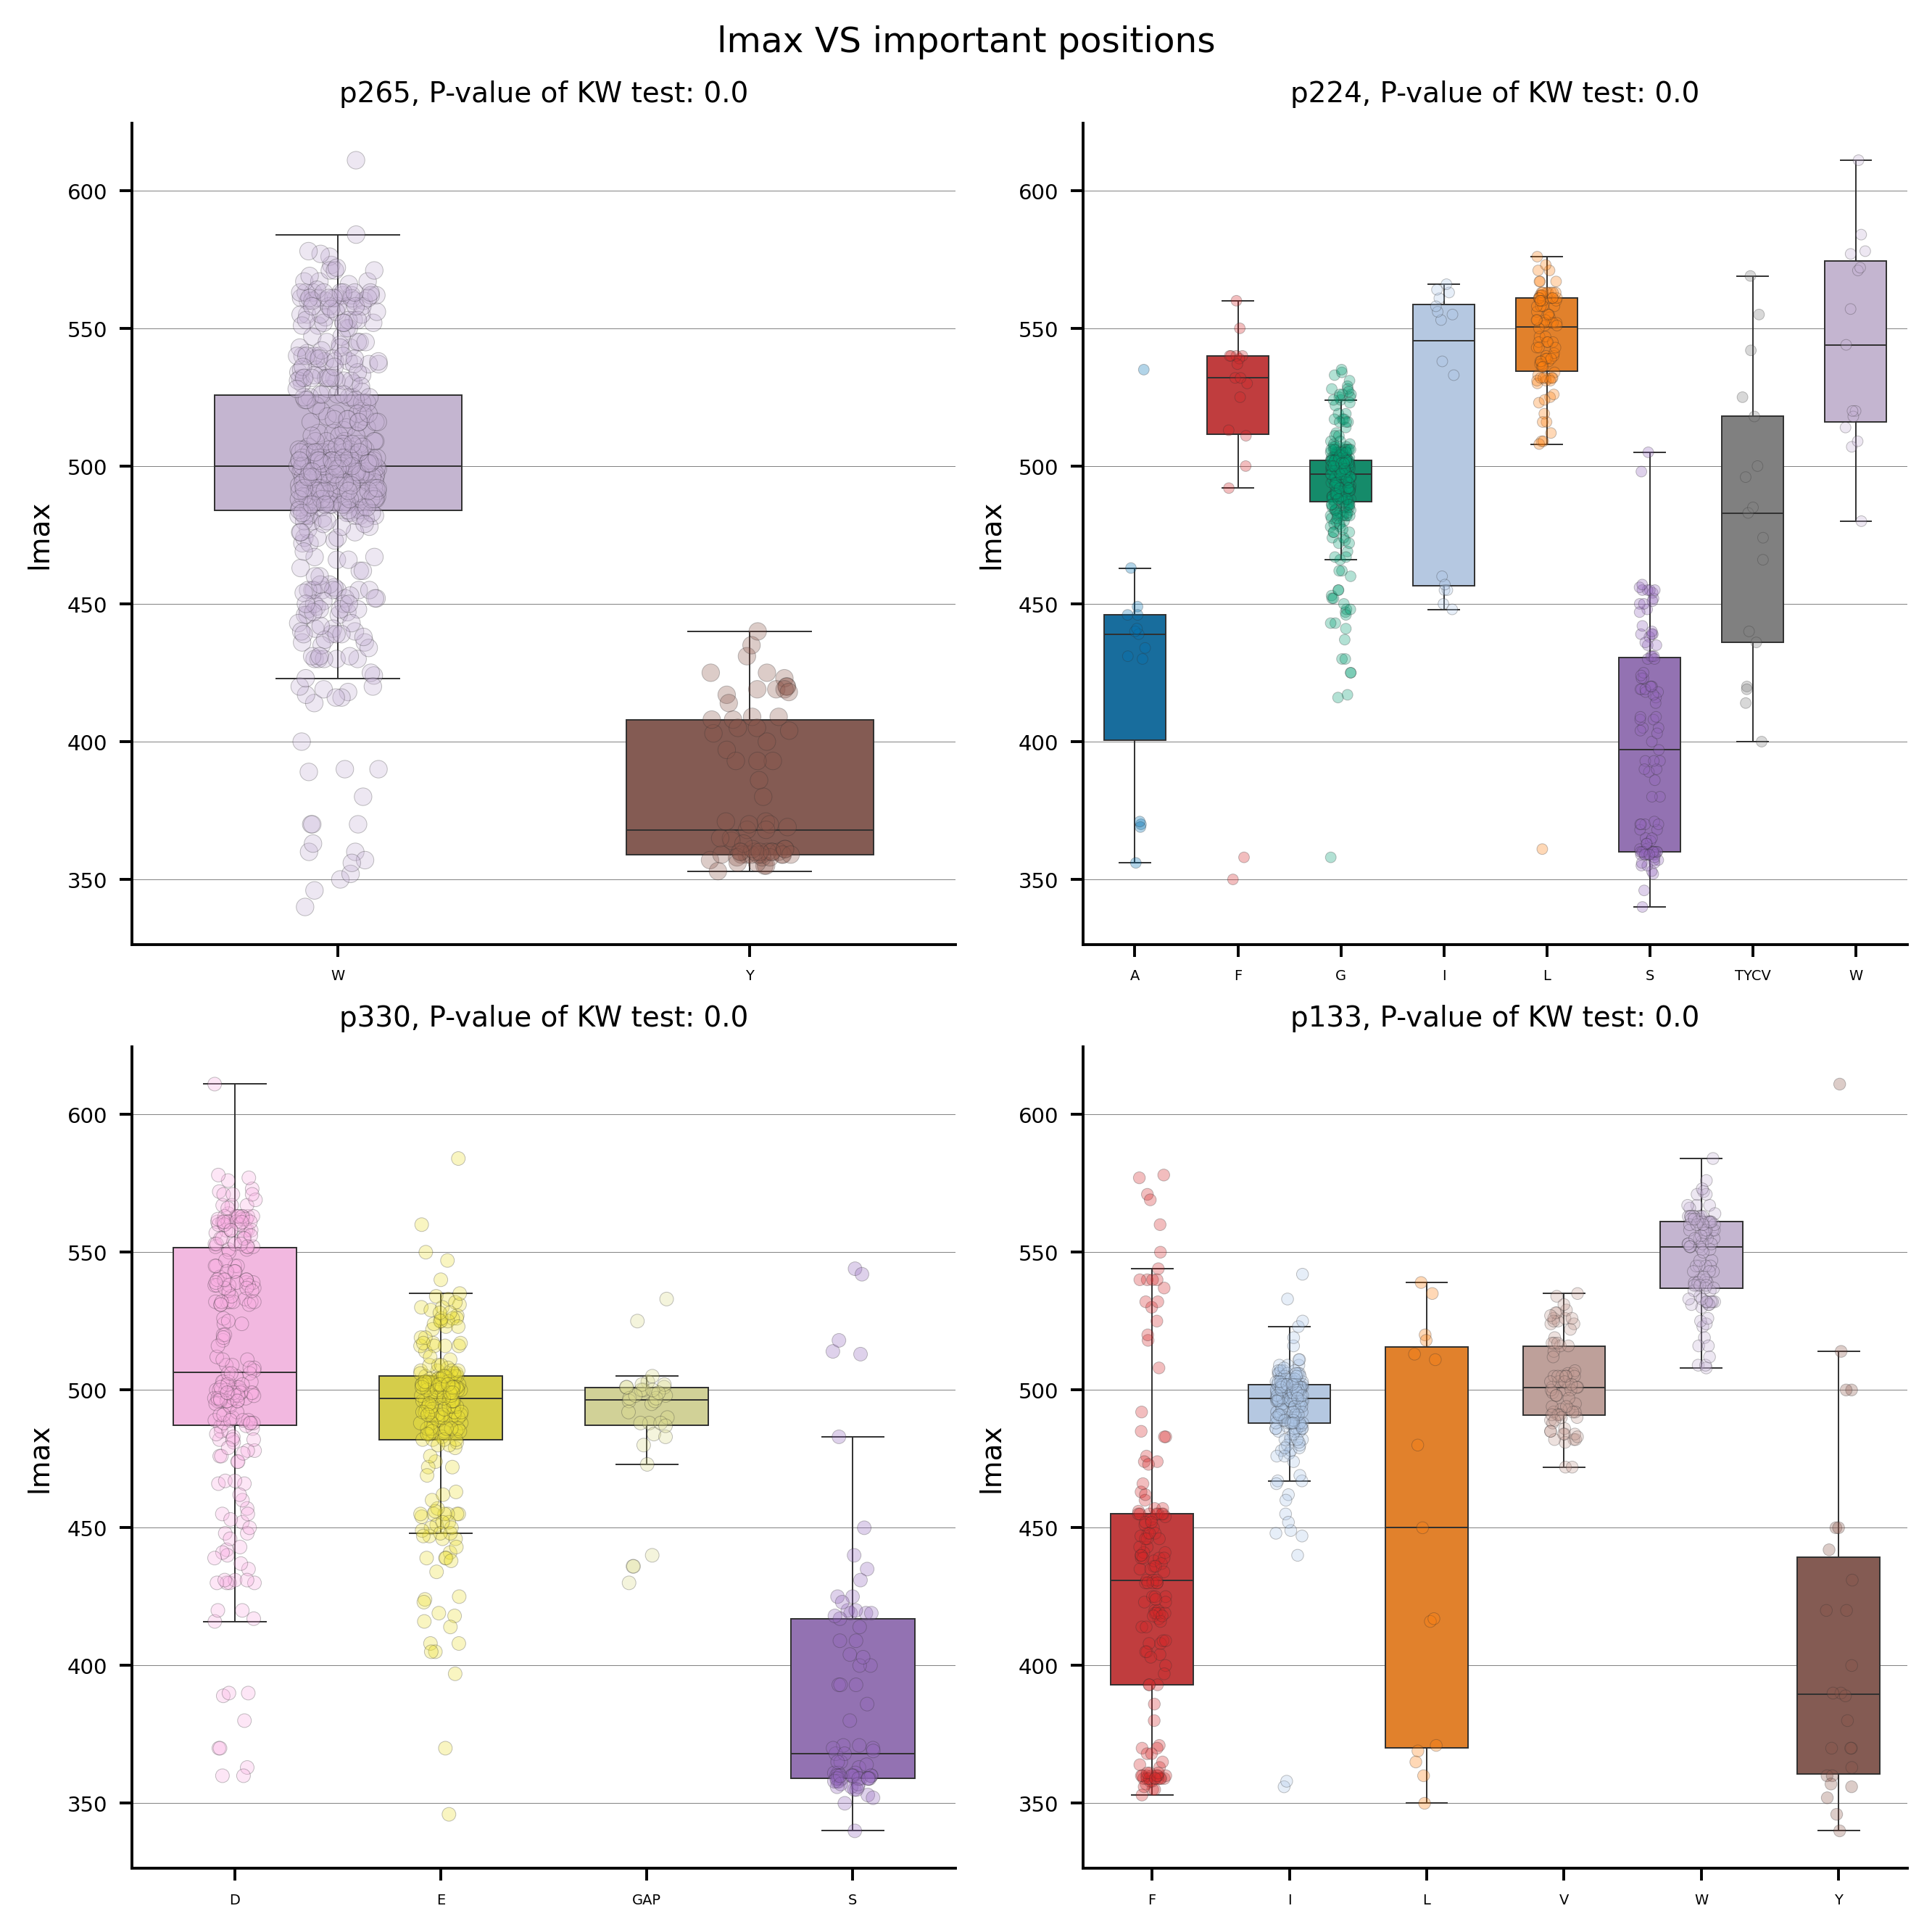

In [108]:
for model in top:
    model_name = model.steps[-1][0]
    dp_plot(importance=importance_from_pipe(model),
            imp_col='standard_value',
            model_name = model_name, report_dir=report_dir)
    
    plot_imp_model(importance=importance_from_pipe(model), 
               X_train=test_copy, y_train=y, model_name=model_name,
                   meta_var='lmax', model_type=ana_type, report_dir=report_dir)

In [ ]:
pl = plot_imp_all(final_models=top,
                  X_train=tr, y_train=y,
                  model_type = ana_type,
                  report_dir=report_dir, max_plots=10,
                  figsize=(2.5, 3))

In [88]:
from deepBreaks.utils import load_obj
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [89]:
top_per_mod = report_dir + '/' + mtml[2] + '.pkl'
load_top_mod = load_obj(top_per_mod)

In [ ]:
print(f'Here is a list of your top performing models to test...\n{mtml}')

# <font color=red>STEP 4: Translate Candidate STSs</font> 
## This section is used to translate candidate STSs to the bovine or squid equivalent.
### The bovine and squid sequence dataframes that were saved earlier and are called again here


In [91]:
import pandas as pd
import os

In [92]:
#STEP 4: Translate Candidate STSs 
#translate candidate STSs to the bovine or squid equivalent 
#bovine and squid sequence dataframes were saved earlier and are called again here
m = 0
tm = ''
k=0
gaps=0
#import importance_report.csv from report_dir
true_pos = []
aa = []
tmd = []
df = pd.read_csv(f'{report_dir}\importance_report.csv')
#take the list of important sites and translate them to the bovine standard equivalent, 
#we do this by taking the site number and subtracting the number of '-' between the start of the sequence and the desired site. 
for rows in reference_seq.values:  
    rows = str(rows)
    #print(rows)
    if rows == 'nan':
    #We want to write the 'true_pos', 'aa', and 'TMD' to the 'importance_report' csv file
        gaps += 1
        k += 1
        true_pos.append('NA')
        aa.append('-')
        tmd.append('NA')
    else:
        #print("The number of gaps is " + str(gaps))
        k+=1
        trans_site = k - gaps
        if ref_seq_name == 'bovine':
            if trans_site in range(3,37):
                tm = 'N-Termina'
            elif trans_site in range(37,62):
                tm = '1'
            elif trans_site in range(74,96):
                tm = '2'
            elif trans_site in range(111,133):
                tm = '3'
            elif trans_site in range(153,174):
                tm = '4'
            elif trans_site in range(203,225):
                tm = '5'
            elif trans_site in range(253,275):
                tm = '6'
            elif trans_site in range(287,309):
                tm = '7'
            else:
                tm = 'CT/EC'
        else:
            if trans_site in range(3,34):
                tm = 'N-Termina'
            elif trans_site in range(34,59):
                tm = '1'
            elif trans_site in range(71,97):
                tm = '2'
            elif trans_site in range(110,132):
                tm = '3'
            elif trans_site in range(152,173):
                tm = '4'
            elif trans_site in range(200,225):
                tm = '5'
            elif trans_site in range(262,284):
                tm = '6'
            elif trans_site in range(294,315):
                tm = '7'
            else:
                tm = 'CT/EC'                
        
        true_pos.append(str(trans_site))
        aa.append(rows)
        tmd.append(tm)
true_pos.pop()
aa.pop()
tmd.pop()

df['true_position'] = true_pos
df['TMD'] = tmd
df['amino_acid'] = aa
df.to_csv(path_or_buf= os.path.join(report_dir,r'importance_report.csv'),index = 'Feature',mode="w")
#df.head()


# <font color=red>STEP 5: Query the Model to Predict NEW Sequences</font> 
## Takes new sequences, inserts them into existing alignment to properly format for model query, then returns prediction of the λmax value for each sequence...

In [93]:
import os
import subprocess
from deepBreaks.utils import load_obj
from deepBreaks.preprocessing import read_data
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from vpod_scripts.prediction_functions_db import process_sequences_from_file

This is a version of the prediction method which can be used DIRECTLY after model training... 

In [ ]:
#path to the mafft.bat file - change to your own directory!
mafft_exe = 'C:/Users/safra/mafft-win/mafft.bat'
#path to sequences we want to add to an existing alignment in FASTA format
input_file = './subtests/supp_test_data/msp_erg_raw.txt'
#name for desired output file
output_file = 'opsin_predictions.tsv'
#path to target/selected model
selected_model = report_dir + '/' + mtml[2] + '.pkl'
#function for querying model - this will take care of creating an output file for you.
process_sequences_from_file(mafft_exe,input_file,output_file,selected_model,seqFileName, gap_threshold=gap_threshold)


In [ ]:
#path to the mafft.bat file - change to your own directory!
mafft_exe = 'C:/Users/safra/mafft-win/mafft.bat'
#path to sequences we want to add to an existing alignment in FASTA format
input_file = './subtests/supp_test_data/msp_erg_raw.txt'
#name for desired output file
output_file = 'opsin_predictions.tsv'
#path to target/selected model
selected_model = report_dir + '/' + mtml[0] + '.pkl'
#function for querying model - this will take care of creating an output file for you.
process_sequences_from_file(mafft_exe,input_file,output_file,selected_model,seqFileName, gap_threshold=gap_threshold)
